In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
fedesoriano_stroke_prediction_dataset_path = kagglehub.dataset_download('fedesoriano/stroke-prediction-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(fedesoriano_stroke_prediction_dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/root/.cache/kagglehub/datasets/fedesoriano/stroke-prediction-dataset/versions/1/healthcare-dataset-stroke-data.csv


In [ ]:
! pip install --upgrade matplotlib seaborn plotly

# Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno

# Load Data

In [ ]:
data_path = r"/root/.cache/kagglehub/datasets/fedesoriano/stroke-prediction-dataset/versions/1/healthcare-dataset-stroke-data.csv"

In [ ]:
# load the data

df = pd.read_csv(data_path)

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Summary of Data

In [ ]:
# shape of the df

print(f'The dataframe contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataframe contains 5110 rows and 12 columns


In [ ]:
# number of unique values in id column

df['id'].nunique()

5110

In [ ]:
# remove the id column from data

df.drop(columns=['id'],inplace=True)

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# check for missing values
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


**There are `201` missing values in the bmi column**

In [ ]:
# percentage of missing values in data

df['bmi'].isnull().mean() * 100

3.9334637964774952

**Around 4% of data in the BMI column is missing**

<Axes: >

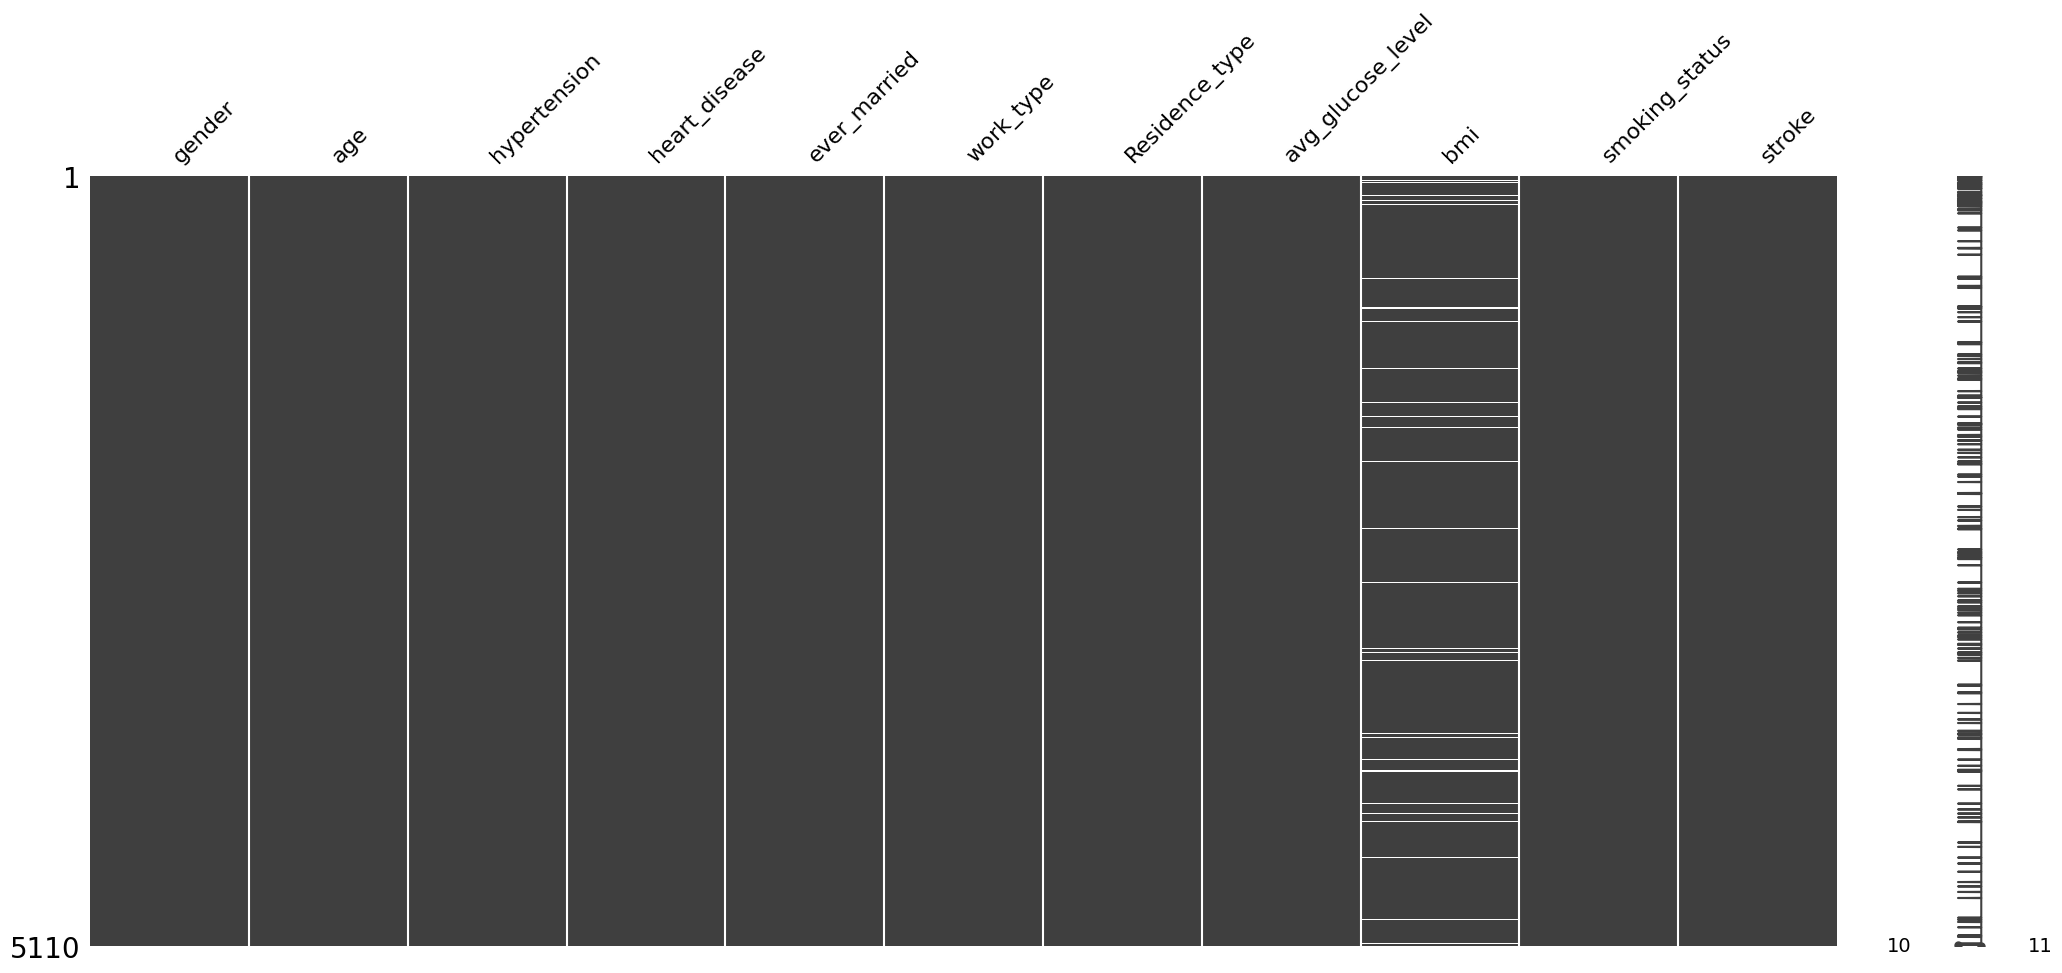

In [ ]:
# plot the missing values matrix

missingno.matrix(df)

In [ ]:
# check for duplicates in data

df.duplicated().sum()

0

**There are no duplicate rows in data**

In [ ]:
# statistical summary of numerical column

df.select_dtypes("float").describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


**Observations**:

1. The maximum value for BMI is observed between the range of 40 to 50. Value of 97 indicates an error in the data.
2. The `avg_glucose_level` column has std of 45, which shows a lot of variation in the glucose levels of the patients.
3. The `age` shows minimum value of 0.08 which is like the age of an infant and should be examined.
4. There are missing values in the `BMI` column.

In [ ]:
# info about the df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


**Points to note**:
1. `Age` column is in float and should be an integer column.
2. There are 5 categorical columns in the data.
3. Columns like `hypertension`, `heart_disease` and `stroke` seems to be binary columns.

# Analysis

In [ ]:
# categories in categorical column

def categories_in_columns(df):
    categorical = df.select_dtypes("object")
    for col in categorical.columns:
        unique_count = categorical[col].nunique()
        unique_vals = categorical[col].unique().tolist()
        print(f"{col.title()} has {unique_count} categories --> {unique_vals}")

categories_in_columns(df)

Gender has 3 categories --> ['Male', 'Female', 'Other']
Ever_Married has 2 categories --> ['Yes', 'No']
Work_Type has 5 categories --> ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Residence_Type has 2 categories --> ['Urban', 'Rural']
Smoking_Status has 4 categories --> ['formerly smoked', 'never smoked', 'smokes', 'Unknown']


In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#

## Stroke (Target)

In [ ]:
# distribution of target column in data

df['stroke'].value_counts(normalize=True) * 100

,proportion
stroke,
0,95.127202
1,4.872798


**Observation**

- The target column has distribution of 95 - 5% almost.
- Highly Skewed
- Target event is Rare.

In [ ]:
# data summary based on target

target_group = df.groupby("stroke")

In [ ]:
target_group[df.select_dtypes("float").columns].describe().T

stroke                             0           1
age               count  4861.000000  249.000000
                  mean     41.971545   67.728193
                  std      22.291940   12.727419
                  min       0.080000    1.320000
                  25%      24.000000   59.000000
                  50%      43.000000   71.000000
                  75%      59.000000   78.000000
                  max      82.000000   82.000000
avg_glucose_level count  4861.000000  249.000000
                  mean    104.795513  132.544739
                  std      43.846069   61.921056
                  min      55.120000   56.110000
                  25%      77.120000   79.790000
                  50%      91.470000  105.220000
                  75%     112.830000  196.710000
                  max     267.760000  271.740000
bmi               count  4700.000000  209.000000
                  mean     28.823064   30.471292
                  std       7.908287    6.329452
                  min      10.300000   16.900000
                  25%      23.400000   26.400000
                  50%      28.000000   29.700000
                  75%      33.100000   33.700000
                  max      97.600000   56.600000

In [ ]:
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64
smoking_status,object


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
# relationship of target with categorical columns

TARGET = "stroke"

for col in df.drop(columns=TARGET).select_dtypes(exclude="float").columns.tolist():
    contingency = pd.crosstab(df[TARGET],df[col])
    chi2_test = chi2_contingency(contingency)
    p_val = chi2_test.pvalue
    alpha = 0.05
    print(f"{TARGET} and {col} are related" if p_val <= alpha else f"{TARGET} and {col} are not related",f"p_values = {p_val}",
          sep="\n",end="\n\n")


stroke and gender are not related
p_values = 0.7895490538408245

stroke and hypertension are related
p_values = 1.661621901511823e-19

stroke and heart_disease are related
p_values = 2.0887845685229236e-21

stroke and ever_married are related
p_values = 1.6389021142314745e-14

stroke and work_type are related
p_values = 5.397707801896119e-10

stroke and Residence_type are not related
p_values = 0.29833169286876987

stroke and smoking_status are related
p_values = 2.0853997025008455e-06



In [ ]:
from scipy.stats import ttest_ind

In [ ]:
# relationship of target with numerical columns

for col in df.drop(columns=TARGET).select_dtypes(include="float").columns.tolist():
    group_a = df.loc[df[TARGET] == 0, col]
    group_b = df.loc[df[TARGET] == 1, col]
    ttest = ttest_ind(group_a, group_b,nan_policy='omit')
    alpha = 0.05
    p_val = ttest.pvalue
    print(f"{TARGET} and {col} are related" if p_val <= alpha else f"{TARGET} and {col} are not related",f"p_values = {p_val}",
          sep="\n",end="\n\n")


stroke and age are related
p_values = 7.0307775129939774e-71

stroke and avg_glucose_level are related
p_values = 2.7678105194741054e-21

stroke and bmi are related
p_values = 0.0029832690997420824



## Gender

In [ ]:
# distribution of gender in data

df['gender'].value_counts(normalize=True)

,proportion
gender,
Female,0.585910
Male,0.413894
Other,0.000196


**The distribution of gender is skewed. The dataset has more records for Females as compared to Males**

In [ ]:
# distribution of gender in data

df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


**The category `Other` is Rare**

In [ ]:
# row where gender is other

df.loc[df['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


**Can be removed from the data as it is not the target event**

In [ ]:
print("The number of rows in data before gender other is removed",len(df))

df.drop(index=3116,inplace=True)

print("The number of rows in data after gender other is removed",len(df))

The number of rows in data before gender other is removed 5110
The number of rows in data after gender other is removed 5109


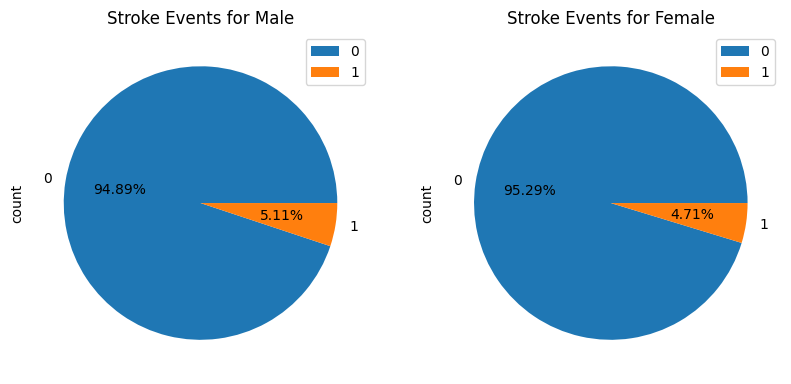

In [ ]:
genders = df['gender'].unique()

plt.figure(figsize=(15,6))

for ind,gender in enumerate(genders):
    df_filtered = df.loc[(df['gender'] == gender),'stroke'].value_counts()
    plt.subplot(1,3,ind+1)
    plt.title(f"Stroke Events for {gender}")
    df_filtered.plot(kind='pie',autopct="%.2f%%")
    plt.legend()

In [ ]:
import plotly.express as px

In [ ]:
# sunburst graph

fig = px.sunburst(data_frame=df.replace({"stroke": {0:"No Stroke",1:"Stroke"}}),
            path=['gender','stroke'],hover_name='gender',hover_data="stroke")

fig.show()

## Age

<Axes: xlabel='age', ylabel='Density'>

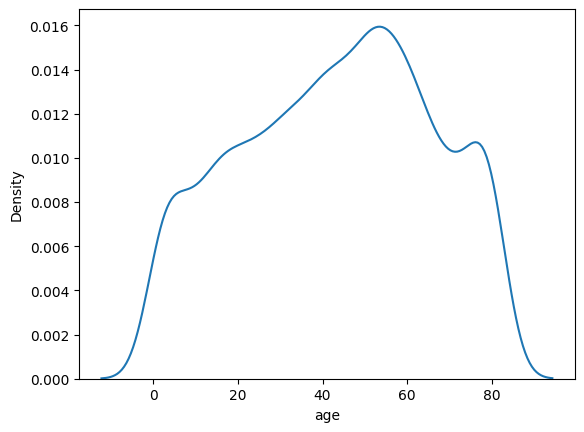

In [ ]:
# kde plot for age

sns.kdeplot(df,x='age')

**The age column appears to be normally distributed**

In [ ]:
# skewness of age column

df['age'].skew()

-0.13743019262921288

**Negative skewness suggests that it is slightly left skewed**

In [ ]:
# summary of age

df['age'].describe()

,age
count,5109.000000
mean,43.229986
std,22.613575
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


<Axes: ylabel='age'>

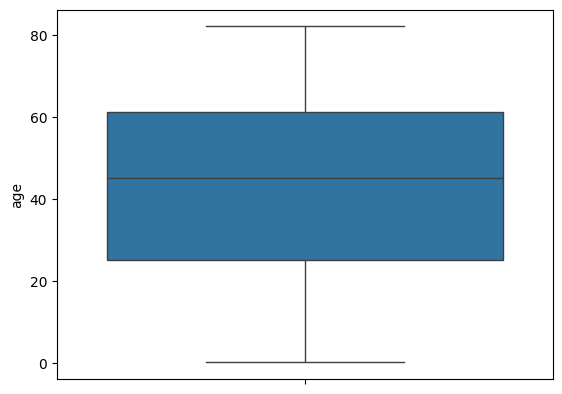

In [ ]:
# boxplot

sns.boxplot(df,y='age')

### Distribution of Age based on Gender

<Axes: xlabel='age', ylabel='Count'>

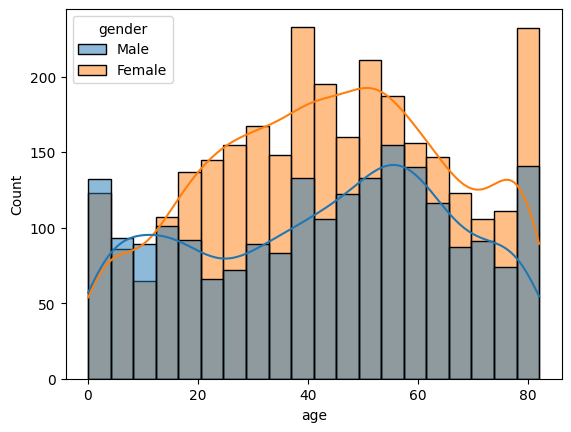

In [ ]:
sns.histplot(df,x='age',kde=True,hue='gender')

In [ ]:
# rows in data where age is less than 1 year

df.loc[df['age'].lt(1),:]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
1206,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0
1317,Male,0.80,0,0,No,children,Rural,98.67,17.5,Unknown,0
1600,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


In [ ]:
# rows in data where age is exactly 1 year

df.loc[df['age'].eq(1),:]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
844,Male,1.0,0,0,No,children,Rural,89.30,21.4,Unknown,0
951,Male,1.0,0,0,No,children,Rural,123.21,15.1,Unknown,0
1432,Male,1.0,0,0,No,children,Urban,101.31,18.3,Unknown,0
1794,Male,1.0,0,0,No,children,Urban,84.85,20.3,Unknown,0
2240,Female,1.0,0,0,No,children,Urban,199.83,24.5,Unknown,0


In [ ]:
# rows in data where age is more than 1 year

df.loc[df['age'].ge(1),:].sample(30)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2491,Female,50.0,0,0,Yes,Self-employed,Rural,95.25,24.3,never smoked,0
2484,Female,17.0,0,0,No,Private,Rural,92.11,43.0,never smoked,0
4113,Male,35.0,0,0,Yes,Private,Rural,95.89,34.2,Unknown,0
3189,Female,32.0,0,0,Yes,Private,Urban,104.92,22.6,never smoked,0
4219,Female,55.0,0,0,Yes,Govt_job,Urban,71.79,43.0,formerly smoked,0
451,Male,13.0,0,0,No,children,Urban,122.31,15.3,never smoked,0
4777,Male,79.0,0,0,Yes,Private,Rural,69.34,29.0,never smoked,0
3379,Female,41.0,0,0,Yes,Private,Urban,74.85,24.8,formerly smoked,0
3413,Male,18.0,0,0,No,Private,Urban,97.39,22.8,never smoked,0
2108,Female,22.0,0,0,No,Private,Urban,73.50,41.3,smokes,0


**People with age greater than 1 year are all integer type age**

In [ ]:
df.loc[df['age'].lt(1),:].shape

(43, 11)

**There are 43 rows in the data which are of newborns and infants in the data**

Almost 1% of data.

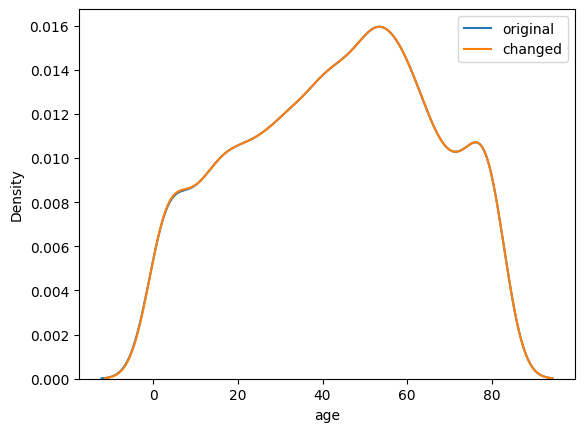

In [ ]:
# convert the age less than 1 into 1 and plot distribution

temp_df = df.copy()

temp_df.loc[temp_df['age'].lt(1),'age'] = 1

sns.kdeplot(df,x='age',label='original')
sns.kdeplot(temp_df,x='age',label='changed')
plt.legend()

In [ ]:
# number of minors in the data

len(df.loc[df['age'].lt(18)])

856

**Minors are people with age less than 18 years**

In [ ]:
# number of children in data

len(df.loc[df['work_type'] == "children"])

687

**Question - Why minors are more than children**

In [ ]:
(
    df.loc[df['age'].lt(18)]
    .groupby('work_type')['age']
    .agg(['min','max','count'])
)

,min,max,count
work_type,,,
Govt_job,14.00,17.0,6
Never_worked,13.00,17.0,17
Private,8.00,17.0,134
Self-employed,7.00,17.0,12
children,0.08,16.0,687


**Minors do not come under the working age group. Their insurance premium is covered by their guardians**

Observations:
1. Either the age in the data is wrong for working professionals.
2. Either the work status added in the data is not correct.

### Working Status of Minors and their Age distribution

<Axes: xlabel='work_type', ylabel='age'>

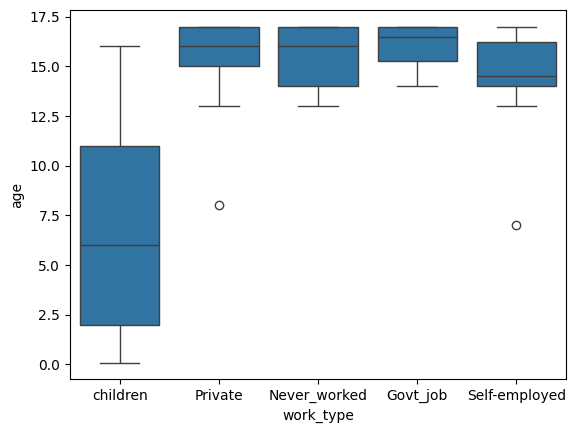

In [ ]:
# boxplot for worktype in minors

sns.boxplot(df.loc[df['age'].lt(18)],x='work_type',y='age')

### Count of Smoking Status in Minors

<Axes: xlabel='smoking_status', ylabel='count'>

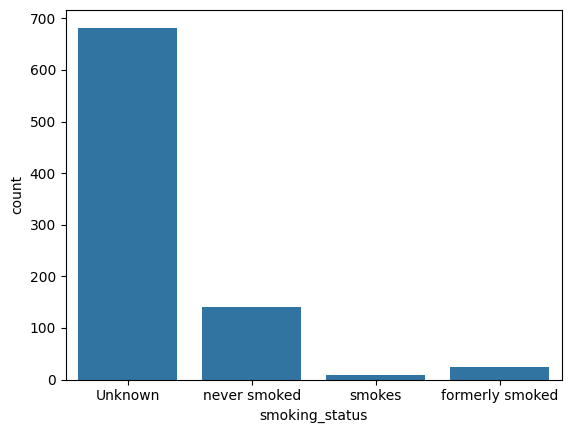

In [ ]:
# smoking in minors

sns.countplot(df.loc[df['age'].lt(18)],x='smoking_status')

<Axes: xlabel='age', ylabel='smoking_status'>

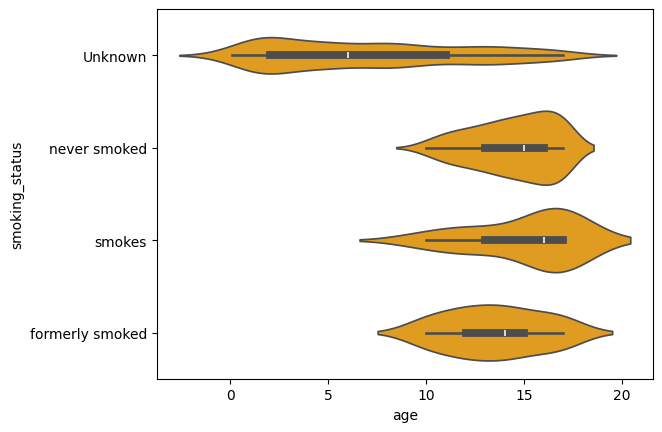

In [ ]:
# smoking in minors wrt age

sns.violinplot(df.loc[df['age'].lt(18)],y='smoking_status',
                x='age',color='orange')

**Key Points**:
1. The spread of the `unknown` smoking category in minors is uniform and across all age groups.
2. The `never smoked` category is of children between the ages 10 to 18, and peaks around the age of 16 or 17 where teens develop their own sense of what decisions to make.
3. The `smokers` also peak around the ages 15 to 16 which can be due to peer pressure or media exposure. The start of smoking at early ages of 6 or 7 is concerning.
4. The `formerly smoked` category is of children between ages 8 to 18. These children may have smoked once or twice under peer pressure. It's good that they have left smoking and now moving towards a healthy lifestyle.

### Event of Stroke and its distribution in minors

<Axes: xlabel='stroke', ylabel='count'>

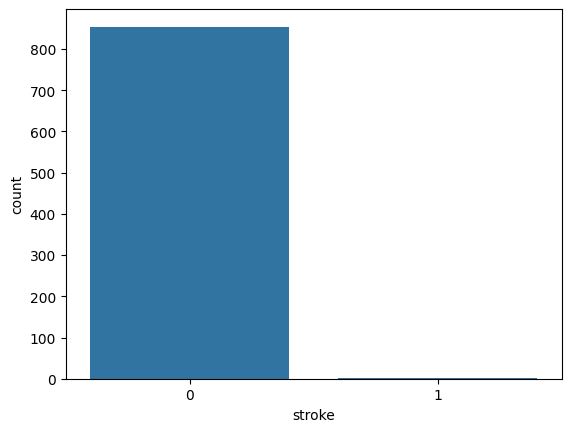

In [ ]:
# stroke count in minors

sns.countplot(df.loc[df['age'].lt(18)],x='stroke')

In [ ]:
df.loc[df['age'].lt(18),'stroke'].value_counts()

,count
stroke,
0,854
1,2


In [ ]:
# rows of data for minors where stroke event occured

df.loc[(df['age'].lt(18)) & (df['stroke'] == 1),:]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1


In [ ]:
# percentage of stroke events in data

(len(df.loc[(df['age'].lt(18)) & (df['stroke'] == 1),:]) / len(df.loc[df['age'].lt(18)])) *100

0.23364485981308408

**Stroke in minors is a rare event**

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Distribution of Age and Marital Status

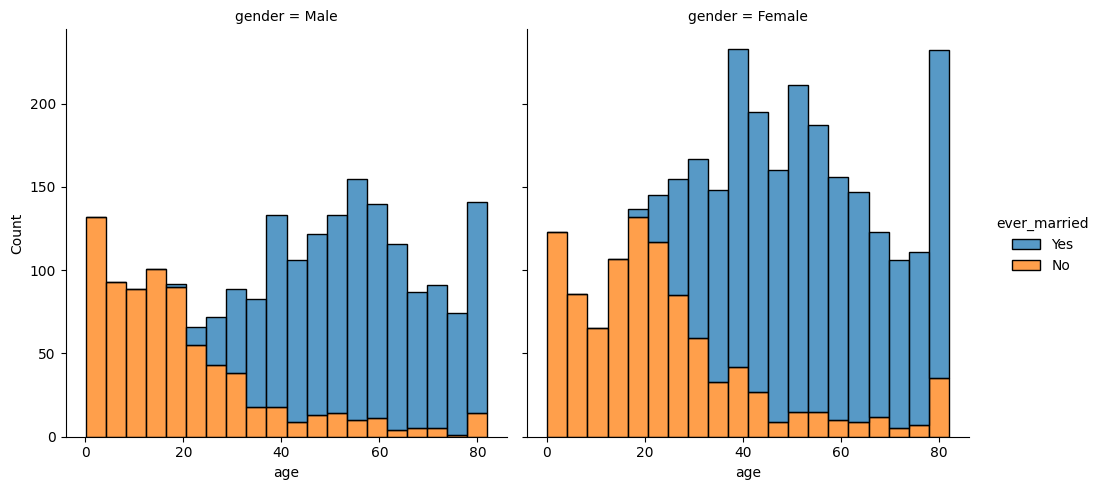

In [ ]:
# age and marital status

sns.displot(df,x='age',hue='ever_married',multiple='stack',col='gender')

In [ ]:
# married minors

df.loc[df['age'].lt(18),"ever_married"].value_counts()

,count
ever_married,
No,856


### Distribution of Age with work type

<Axes: xlabel='work_type', ylabel='age'>

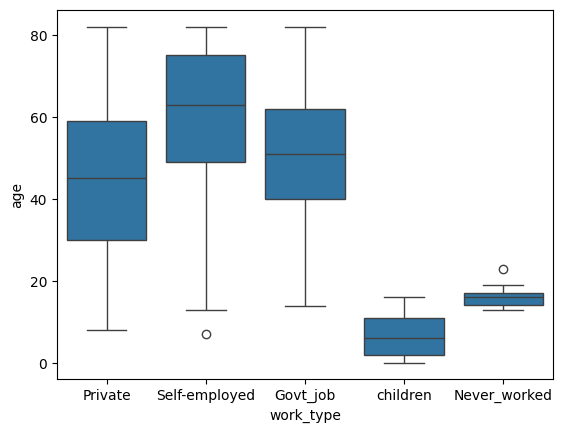

In [ ]:
# age and work type

sns.boxplot(df,x='work_type',y='age')

**People usually come under working age bracket after their 20s**

In [ ]:
# maximum age of children

df.loc[df['work_type'] == "children","age"].max()

16.0

In [ ]:
# bin age columns

age_bins = [0, 18, 35, 50, 65, int(df['age'].max())]
age_labels = ['0-18', '19-35', '36-50', '51-65', '66 & above']
df['age_binned'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True)

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_binned
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,66 & above
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,51-65
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,66 & above
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,36-50
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,66 & above
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,66 & above
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,66 & above
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,19-35
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,51-65


### What is the distribution of BMI with different age bins

<Axes: xlabel='age_binned', ylabel='bmi'>

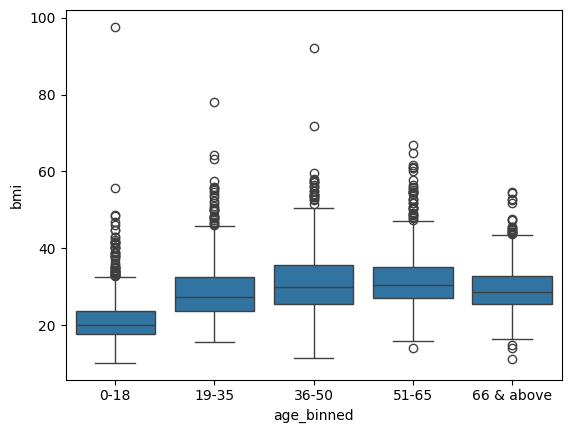

In [ ]:
# bmi distribution according to age bins

sns.boxplot(df,x='age_binned',y='bmi')

Observations:
1. The BMI of above 50 are outliers
2. The child/minor shows the BMI value of 100 which is clearly an outlier. Such High BMI values are exceptions and should be handled before model building.

<Axes: xlabel='age_binned', ylabel='bmi'>

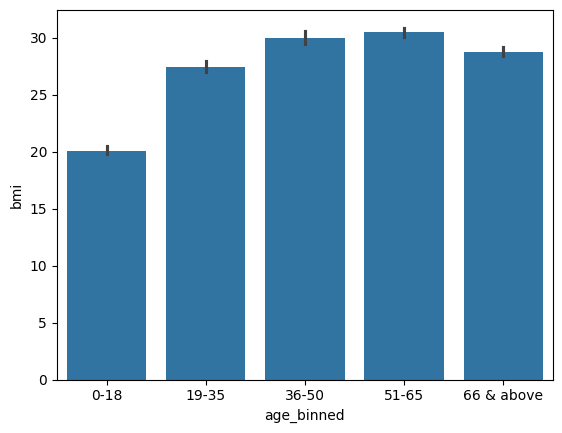

In [ ]:
# median bmi in all age groups

sns.barplot(df,x='age_binned',y='bmi',estimator='median')

**The BMI column has outliers so median was taken as an estimator**

### Event of Hypertension in different age groups

<Axes: xlabel='age_binned'>

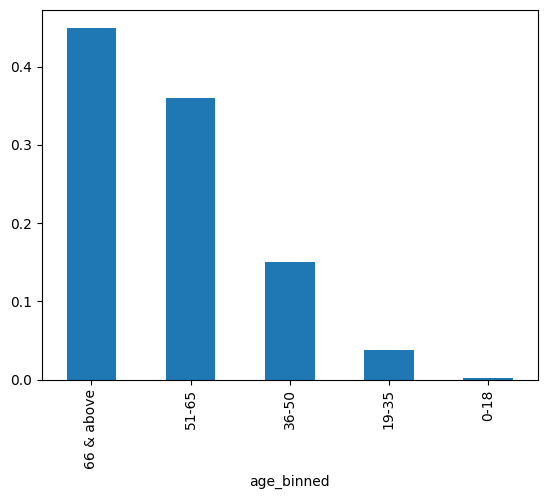

In [ ]:
# hypertension frequency in different age groups

df.loc[df['hypertension'] == 1,'age_binned'].value_counts(normalize=True).plot(kind='bar')

**Higher aged individuals show more events of hypertension in the data**

### Event of Heart Disease in different age groups

<Axes: xlabel='age_binned'>

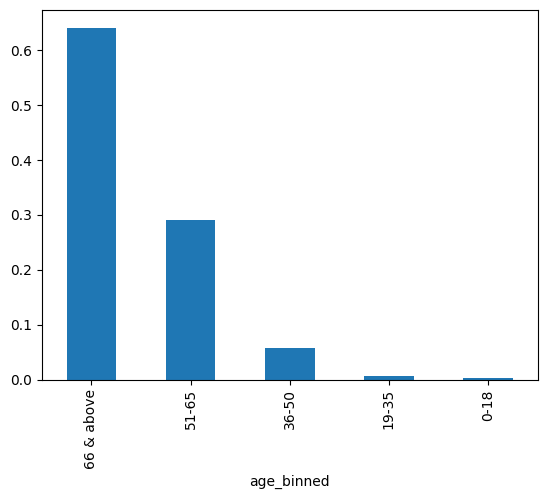

In [ ]:
df.loc[df['heart_disease'] == 1,'age_binned'].value_counts(normalize=True).plot(kind='bar')

**Higher aged individuals show more events of heart disease in the data**

### Event of Stroke in different age groups

<Axes: xlabel='age_binned'>

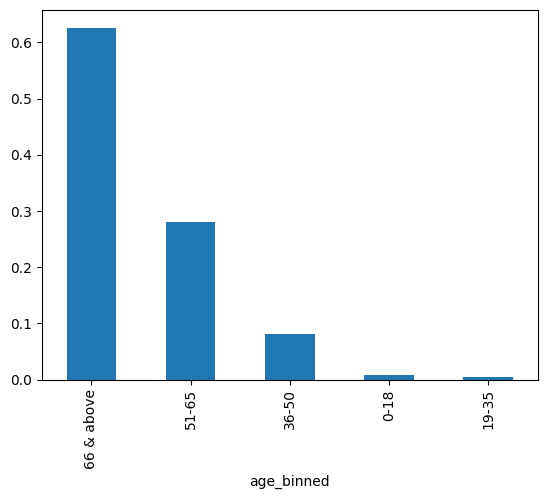

In [ ]:
df.loc[df['stroke'] == 1,'age_binned'].value_counts(normalize=True).plot(kind='bar')

**Higher aged individuals show more events of stroke in the data**

<Axes: xlabel='heart_disease'>

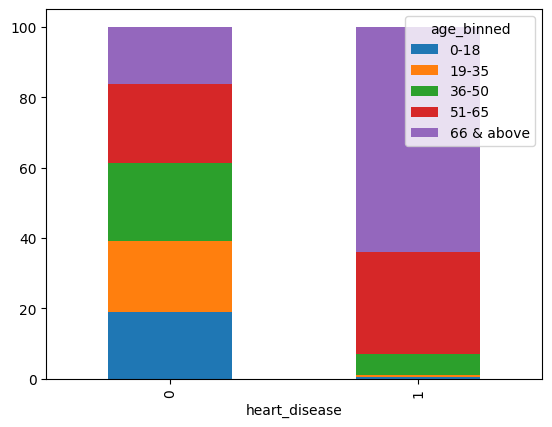

In [ ]:
# relationship between age and heart disease

(
    pd.crosstab(df['heart_disease'],df['age_binned'])
    .div(pd.crosstab(df['heart_disease'],df['age_binned']).sum(axis=1),axis=0)
    .mul(100).plot(kind='bar',stacked=True)
)

<Axes: xlabel='stroke'>

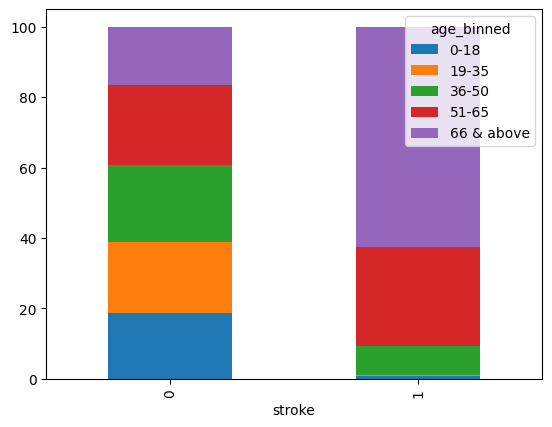

In [ ]:
# relationship between age and stroke

(
    pd.crosstab(df['stroke'],df['age_binned'])
    .div(pd.crosstab(df['stroke'],df['age_binned']).sum(axis=1),axis=0)
    .mul(100).plot(kind='bar',stacked=True)
)

## Hypertension

In [ ]:
# distribution of patients with hypertension in data

df['hypertension'].value_counts(normalize=True).mul(100)

,proportion
hypertension,
0,90.252496
1,9.747504


**About 10% patients in the data that suffer from hypertension**

In [ ]:
# relationship between stroke and hypertension

from scipy.stats import chi2_contingency

observed = pd.crosstab(index=df['stroke'],columns=df['hypertension'])

alpha = 0.05

stats, p_val, _, _ = chi2_contingency(observed)

if p_val <= alpha:
    print("Reject H_0, Hypertension and Stroke events are related")
else:
    print("Failed to reject H_0, Hypertension and Stroke events are unrelated")

Reject H_0, Hypertension and Stroke events are related


In [ ]:
print(p_val)

1.688936253410575e-19


In [ ]:
# Releationship between smoking and Hypertension

observed = pd.crosstab(index=df['smoking_status'],columns=df['hypertension'])

alpha = 0.05

stats, p_val, _, _ = chi2_contingency(observed)

if p_val <= alpha:
    print("Reject H_0, Hypertension and Smoking events are related")
else:
    print("Failed to reject H_0, Hypertension and Smoking events are unrelated")

Reject H_0, Hypertension and Smoking events are related


In [ ]:
print(p_val)

2.1899948949010706e-22


<Axes: xlabel='hypertension', ylabel='age'>

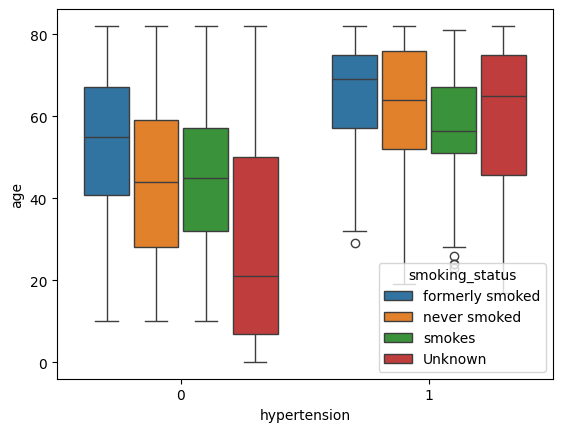

In [ ]:
# age of people with hypertension who also smoked

sns.boxplot(df,y='age',x='hypertension',hue='smoking_status',gap=0.1)

In [ ]:
# pivot table for age and bmi with people with hypertension and their smoking status

df.pivot_table(index='smoking_status',columns='hypertension',values='age',
              aggfunc=['min','mean','max'])

min             mean              max      
hypertension         0     1          0          1     0     1
smoking_status                                                
Unknown           0.08  17.0  29.134718  61.653846  82.0  82.0
formerly smoked  10.00  29.0  53.294503  65.583333  82.0  82.0
never smoked     10.00  19.0  44.505422  62.767241  82.0  82.0
smokes           10.00  23.0  45.753957  57.021277  82.0  81.0

<Axes: xlabel='age_binned', ylabel='bmi'>

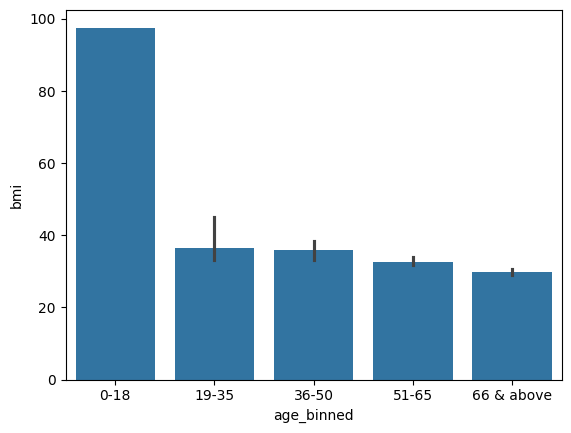

In [ ]:
# meedian bmi of people having hypertension in different age groups

sns.barplot(df.loc[df['hypertension'].eq(1)],y='bmi',x='age_binned',estimator='median')

### Is Hypertension related to marriage

<Axes: xlabel='ever_married', ylabel='count'>

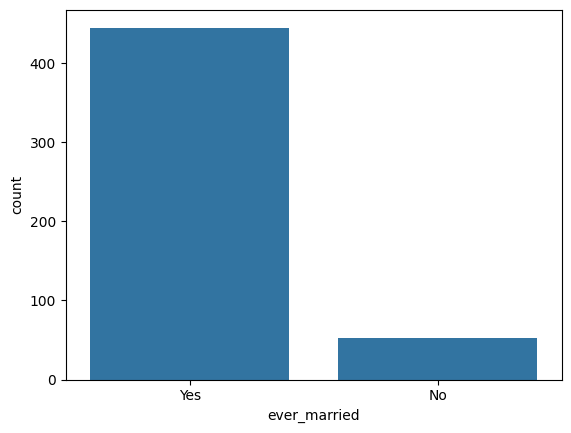

In [ ]:
sns.countplot(df.loc[df['hypertension'].eq(1)],x='ever_married')

**Hypertension is related to age and the age group which is married is also of older age bracket which is more probable of having hypertension**

In [ ]:
# perform chi2 test

# Releationship between Marriage and Hypertension

observed = pd.crosstab(index=df['ever_married'],columns=df['hypertension'])

alpha = 0.05

stats, p_val, _, _ = chi2_contingency(observed)

if p_val <= alpha:
    print("Reject H_0, Hypertension and Marriage are related")
else:
    print("Failed to reject H_0, Hypertension and Marriage are unrelated")

Reject H_0, Hypertension and Marriage are related


<Axes: xlabel='hypertension'>

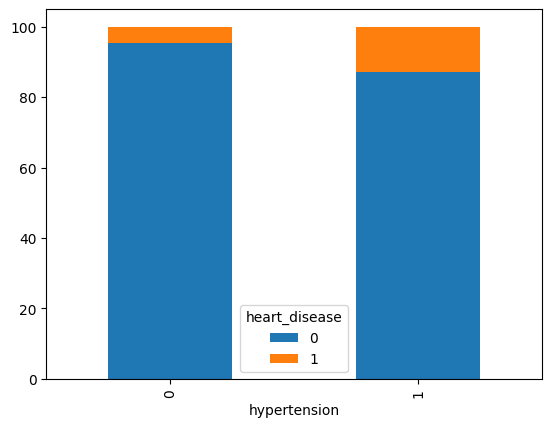

In [ ]:
# percentage of people who had both hypertension and heart disease

(
    pd.crosstab(df['hypertension'],df['heart_disease'])
    .div(pd.crosstab(df['hypertension'],df['heart_disease']).sum(axis=1),axis=0)
    .mul(100).plot(kind='bar',stacked=True)
)

In [ ]:
# perform chi2 test

# Releationship between Heart Disease and Hypertension

observed = pd.crosstab(index=df['heart_disease'],columns=df['hypertension'])

alpha = 0.05

stats, p_val, _, _ = chi2_contingency(observed)

if p_val <= alpha:
    print("Reject H_0, Hypertension and Heart Disease are related")
else:
    print("Failed to reject H_0, Hypertension and Heart Disease are unrelated")

Reject H_0, Hypertension and Heart Disease are related


In [ ]:
p_val

2.2386283017948103e-14

<Axes: xlabel='hypertension'>

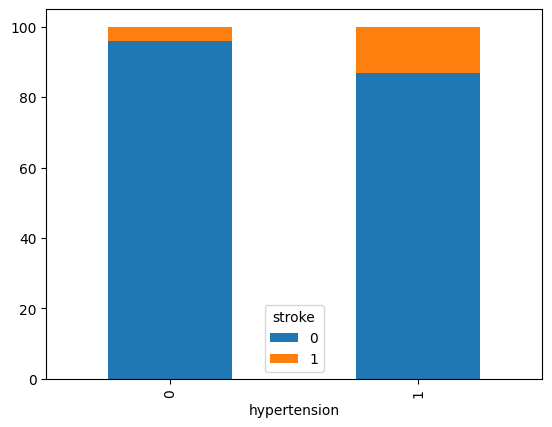

In [ ]:
# percentage of people who had both hypertension and stroke

(
    pd.crosstab(df['hypertension'],df['stroke'])
    .div(pd.crosstab(df['hypertension'],df['stroke']).sum(axis=1),axis=0)
    .mul(100).plot(kind='bar',stacked=True)
)

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_binned'],
      dtype='object')

<Axes: xlabel='hypertension'>

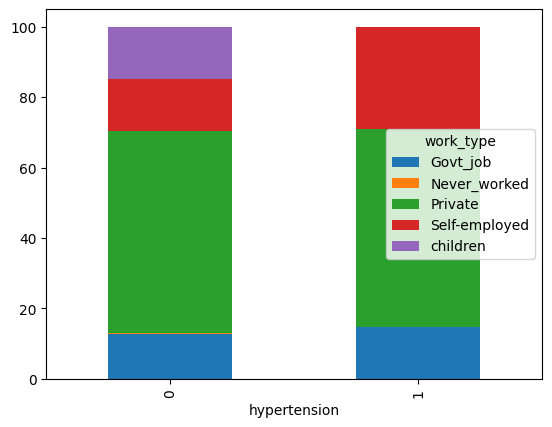

In [ ]:
# hypertension in relationship to type of work

(
    pd.crosstab(df['hypertension'],df['work_type'])
    .div(pd.crosstab(df['hypertension'],df['stroke']).sum(axis=1),axis=0)
    .mul(100).plot(kind='bar',stacked=True)
)

## Heart Disease

In [ ]:
# distribution of heart disease patients in data

df['heart_disease'].value_counts(normalize=True).mul(100)

,proportion
heart_disease,
0,94.597769
1,5.402231


**This distribution shows that people with hypertension are more in the data as compared to that with heart disease**

**This also means that not all hypertension or BP related issues leads to heart disease in people**

In [ ]:
# percentage of people in data that have both heart disease and hypertension

((df['hypertension'] == 1) & (df['heart_disease'] == 1)).mean() * 100

1.2526913290272068

In [ ]:
# percentage of people in data that have both heart disease, hypertension and stroke

((df['hypertension'] == 1) & (df['heart_disease'] == 1) & df["stroke"] == 1).mean() * 100

0.2544529262086514

<Axes: xlabel='age_binned', ylabel='bmi'>

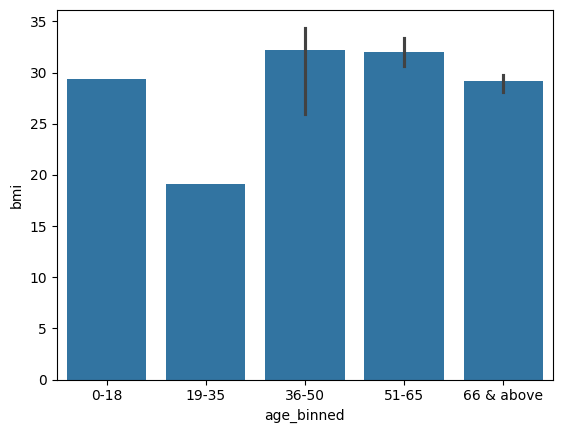

In [ ]:
# median bmi of people having heart disease in different age groups

sns.barplot(df.loc[df['heart_disease'].eq(1)],y='bmi',x='age_binned',estimator='median')

**Observations**:
1. The heart disease events in other age groups apart from 19-35 can be linked to increased BMI levels.
2. For the age group 19-35 there seems to be some other factors that leads to heart disease in these people.

In [ ]:
# people with heart disease in age group 19- 35

df.loc[(df['age_binned'] == "19-35") & (df['heart_disease'] == 1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_binned
342,Male,34.0,0,1,Yes,Private,Urban,106.23,NaN,formerly smoked,0,19-35
3885,Female,28.0,0,1,Yes,Private,Rural,111.27,19.1,smokes,0,19-35


**BMI data of only one person is a very small sample set to reach to any conclusion**

<Axes: xlabel='age_binned', ylabel='count'>

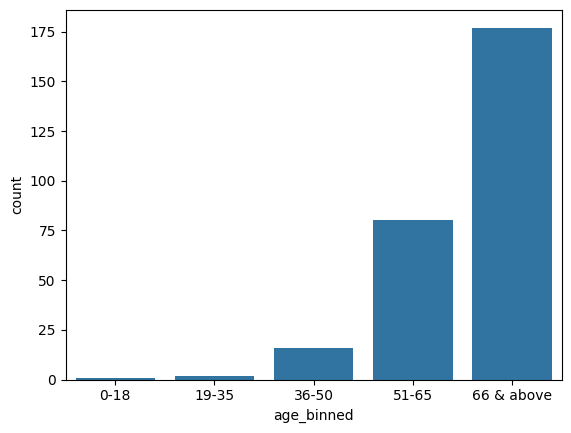

In [ ]:
# heart disease patients in each age group

sns.countplot(df.loc[df['heart_disease'].eq(1)],x='age_binned')

<Axes: xlabel='heart_disease'>

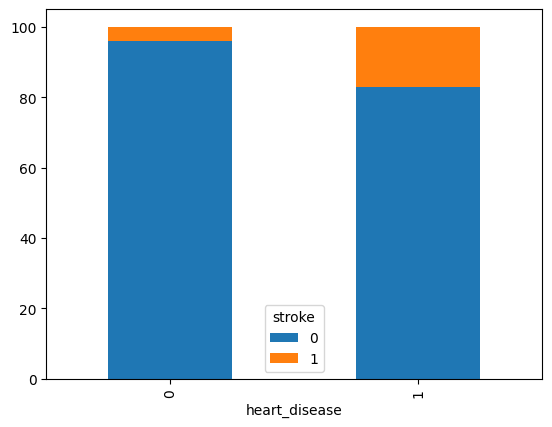

In [ ]:
# percentage of people who had both heart_disease and stroke

(
    pd.crosstab(df['heart_disease'],df['stroke'])
    .div(pd.crosstab(df['heart_disease'],df['stroke']).sum(axis=1),axis=0)
    .mul(100).plot(kind='bar',stacked=True)
)

<Axes: xlabel='age', ylabel='Density'>

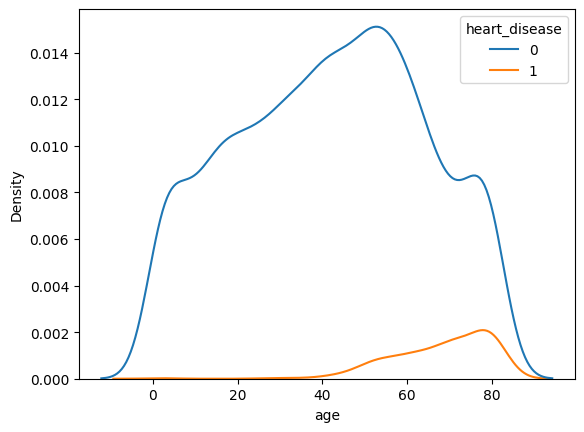

In [ ]:
# distribution of age and heart disease

sns.kdeplot(df,x='age',hue='heart_disease')

**Event of Heart Disease is more prevelant in the mid and older age of life**

<Axes: xlabel='heart_disease'>

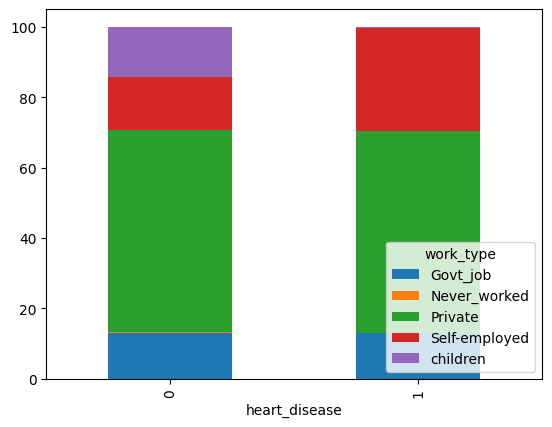

In [ ]:
# heart disease in relationship to type of work

(
    pd.crosstab(df['heart_disease'],df['work_type'])
    .div(pd.crosstab(df['heart_disease'],df['work_type']).sum(axis=1),axis=0)
    .mul(100).plot(kind='bar',stacked=True)
)

<Axes: xlabel='heart_disease'>

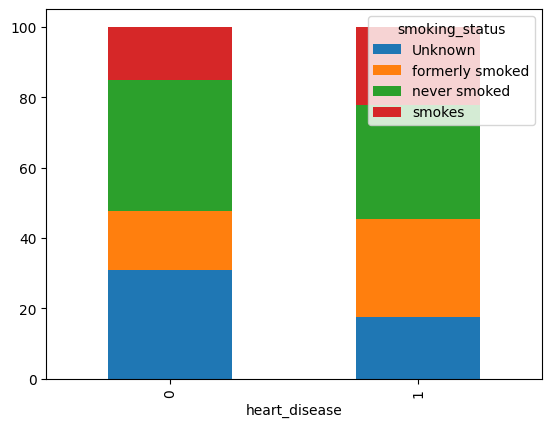

In [ ]:
# is smoking related to heart disease

(
    pd.crosstab(df['heart_disease'],df['smoking_status'])
    .div(pd.crosstab(df['heart_disease'],df['smoking_status']).sum(axis=1),axis=0)
    .mul(100).plot(kind='bar',stacked=True)
)

**The bar chart clearly shows that people who `smoke` or `formerly smoked` have more events of heart_disease**

<Axes: xlabel='smoking_status', ylabel='age'>

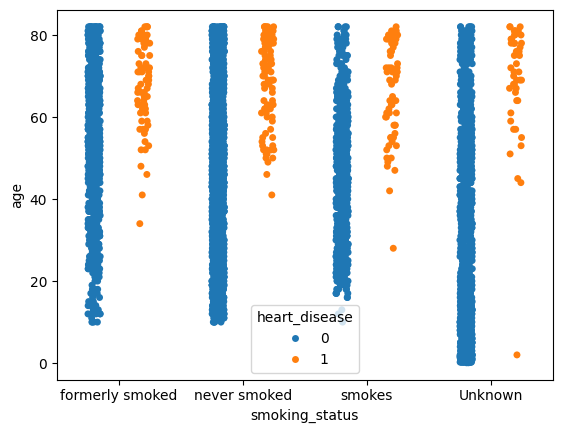

In [ ]:
# distribution of age of smoking types and heart disease

sns.stripplot(df,x='smoking_status',y='age',hue='heart_disease',dodge=True)

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_binned'],
      dtype='object')

In [ ]:
# people with heart disease and their residence

px.pie(df.loc[df['heart_disease'] == 1],names='Residence_type',width=400,height=400)

In [ ]:
# avg age of people having heart disease depending on their work type

df.pivot_table(index='work_type',columns='heart_disease',values='age')

heart_disease,0,1
work_type,,
Govt_job,50.138486,63.666667
Never_worked,16.181818,NaN
Private,44.273319,67.170886
Self-employed,58.796748,73.000000
children,6.848397,2.000000


## Ever_Married

In [ ]:
df['ever_married'].value_counts(normalize=True)

,proportion
ever_married,
Yes,0.656293
No,0.343707


**The data contains more married people as compared to unmarried.**

<Axes: xlabel='heart_disease'>

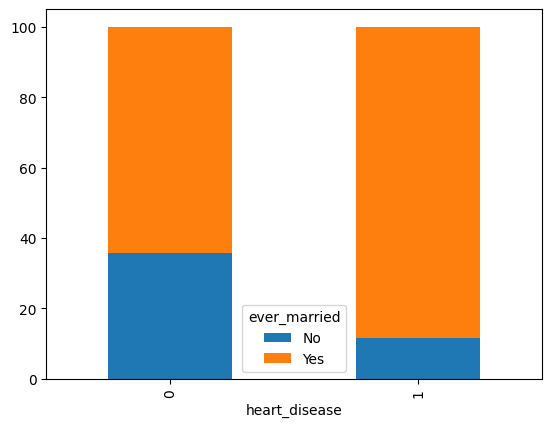

In [ ]:
# relationship between heart disease and marriage

(
    pd.crosstab(df['heart_disease'],df['ever_married'])
    .div(pd.crosstab(df['heart_disease'],df['ever_married']).sum(axis=1),axis=0)
    .mul(100).plot(kind='bar',stacked=True)
)

<Axes: xlabel='hypertension'>

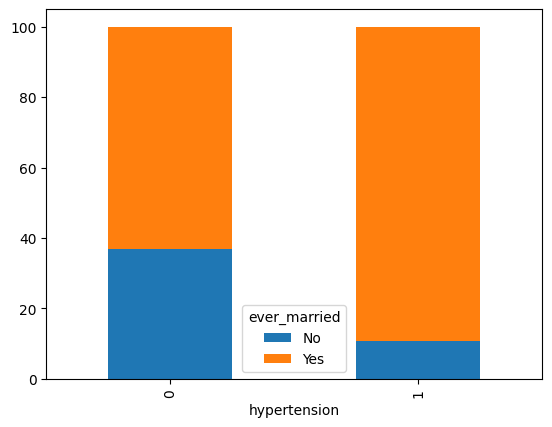

In [ ]:
# relationship between hypertension and marriage

(
    pd.crosstab(df['hypertension'],df['ever_married'])
    .div(pd.crosstab(df['hypertension'],df['ever_married']).sum(axis=1),axis=0)
    .mul(100).plot(kind='bar',stacked=True)
)

<Axes: xlabel='stroke'>

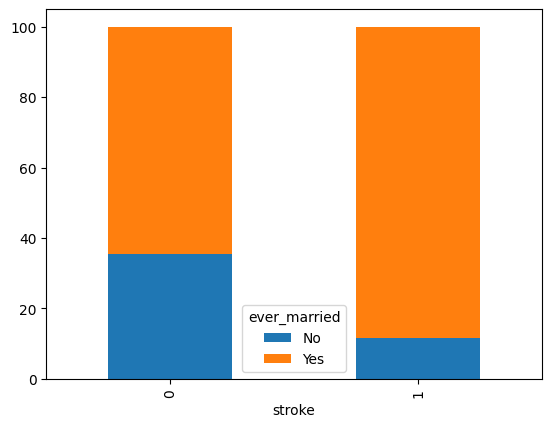

In [ ]:
# relationship between stroke and marriage

(
    pd.crosstab(df['stroke'],df['ever_married'])
    .div(pd.crosstab(df['stroke'],df['ever_married']).sum(axis=1),axis=0)
    .mul(100).plot(kind='bar',stacked=True)
)

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_binned'],
      dtype='object')

In [ ]:
# avg and median age of marriage in each age category

df.pivot_table(index='age_binned',columns='ever_married',values='age',aggfunc=['mean','median'],observed=True).drop(index="0-18")

mean            median      
ever_married         No        Yes     No   Yes
age_binned                                     
19-35         25.131725  30.009029   24.0  31.0
36-50         41.978417  43.375661   41.0  44.0
51-65         56.936709  57.576177   57.0  57.0
66 & above    76.000000  74.406356   78.0  75.0

## Work Type

In [ ]:
# categories in work type column

df['work_type'].unique().tolist()

['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']

In [ ]:
# frequency distribution of categories

df['work_type'].value_counts(normalize=True) * 100

,proportion
work_type,
Private,57.232335
Self-employed,16.030534
children,13.446858
Govt_job,12.859659
Never_worked,0.430613


**Observations**

1. More than half of the people in the data are doing `Private` jobs.
2. The next category of people are those which are `Self-employed`.
3. The Rare category in the data are the people who have `Never Worked`.

In [ ]:
# work distribution among genders

gender_group = df.groupby("gender")

gender_group['work_type'].value_counts(normalize=True).mul(100).unstack()

work_type,Govt_job,Never_worked,Private,Self-employed,children
gender,,,,,
Female,13.326653,0.367401,58.583834,16.833667,10.888444
Male,12.198582,0.520095,55.319149,14.893617,17.068558


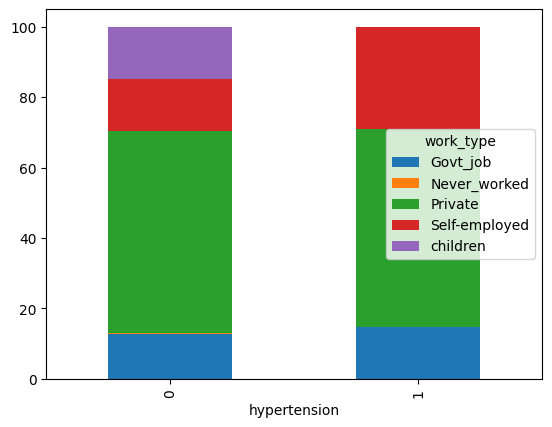

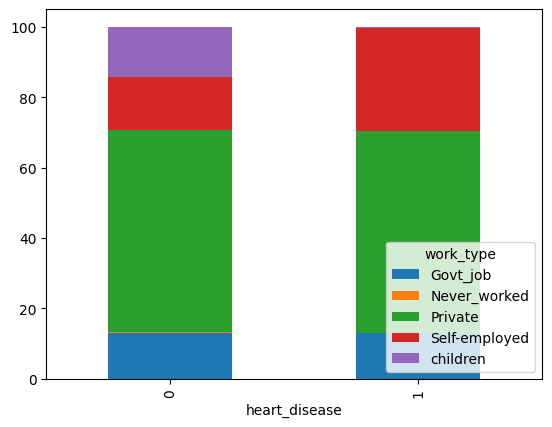

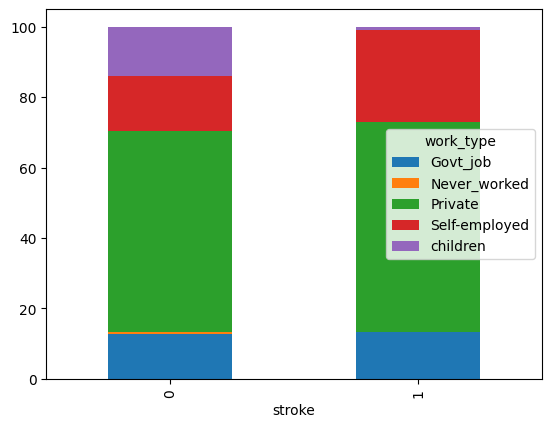

In [ ]:
# relationship between different diseases and work type
for disease in ['hypertension','heart_disease','stroke']:
    (
    pd.crosstab(df[disease],df['work_type'])
    .div(pd.crosstab(df[disease],df['work_type']).sum(axis=1),axis=0)
    .mul(100).plot(kind='bar',stacked=True)
    )
    plt.show()

In [ ]:
# median bmi of each work type individual

work_type_grp = df.groupby("work_type")
work_type_grp['bmi'].agg("median")


,bmi
work_type,
Govt_job,29.40
Never_worked,23.15
Private,28.95
Self-employed,29.40
children,18.90


**People who are not in any sort of employement show lower BMI's as compared to people who are working**

In [ ]:
# median blood glucose level for each work type
work_type_grp['avg_glucose_level'].agg(["median","mean"])

,median,mean
work_type,,
Govt_job,91.93,107.779772
Never_worked,86.02,96.042727
Private,91.91,106.784350
Self-employed,93.60,112.645446
children,90.22,94.400277


In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_binned'],
      dtype='object')

## Avg Glucose Level

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

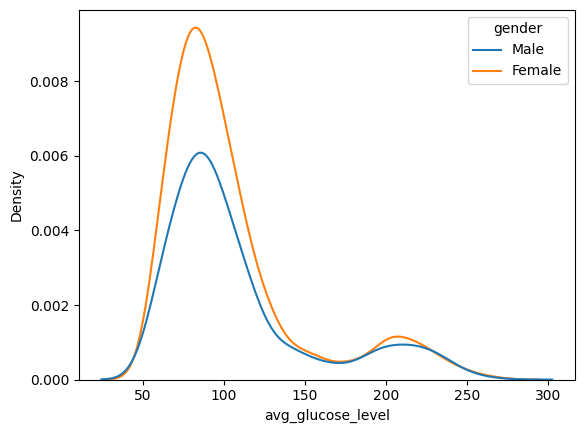

In [ ]:
# kde plot for distribution of avg glucode level based on gender

sns.kdeplot(df,x="avg_glucose_level",hue='gender')

In [ ]:
# person with maximum glucose level in the data

df.loc[df['avg_glucose_level'] == df['avg_glucose_level'].max()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_binned
193,Male,68.0,1,1,Yes,Private,Rural,271.74,31.1,smokes,1,66 & above


In [ ]:
# avg glucose level of people with all three diseases

df.loc[df[['heart_disease','hypertension','stroke']].all(axis=1),['avg_glucose_level','bmi']].agg(["max","mean"])

,avg_glucose_level,bmi
max,271.740000,40.500000
mean,168.310769,32.554545


<Axes: xlabel='gender', ylabel='avg_glucose_level'>

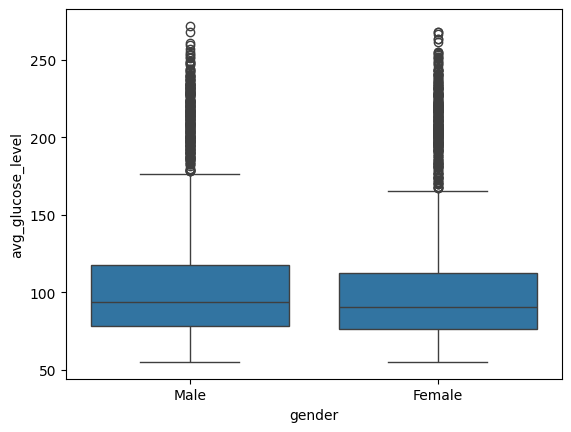

In [ ]:
# boxplots

sns.boxplot(df,y='avg_glucose_level',x='gender')

<Axes: xlabel='age', ylabel='avg_glucose_level'>

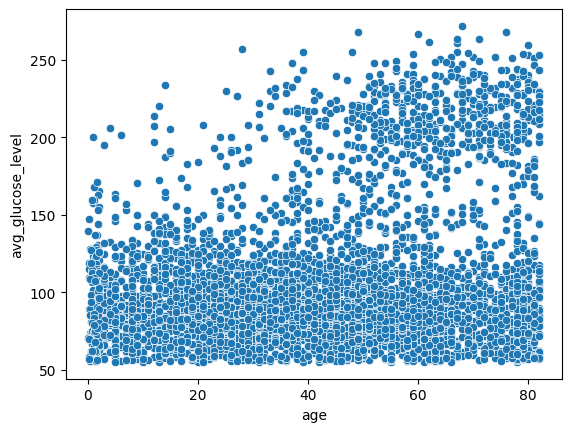

In [ ]:
# age vs avg glucose level

sns.scatterplot(df,x='age',y='avg_glucose_level')

<Axes: xlabel='work_type', ylabel='avg_glucose_level'>

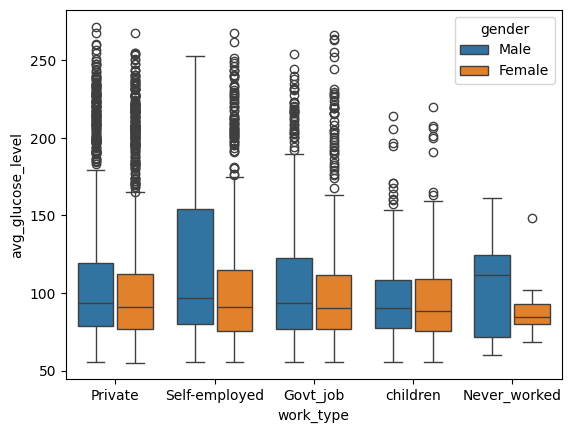

In [ ]:
# avg glucose level depending on work type

sns.boxplot(df,x='work_type',y='avg_glucose_level',hue='gender',gap=0.1)

<Axes: xlabel='hypertension', ylabel='avg_glucose_level'>

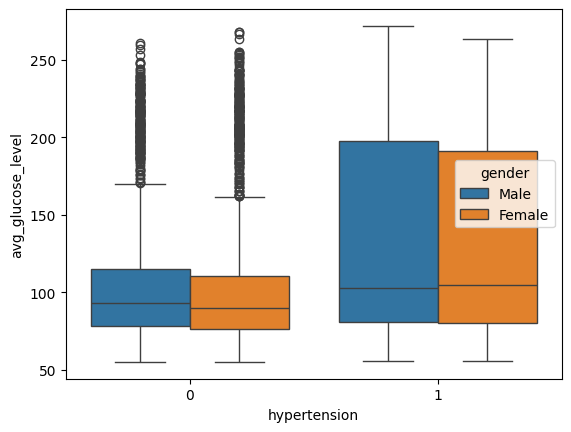

In [ ]:
# avg glucose level of person with hypertension

sns.boxplot(df,x='hypertension',y='avg_glucose_level',hue='gender')

<Axes: xlabel='heart_disease', ylabel='avg_glucose_level'>

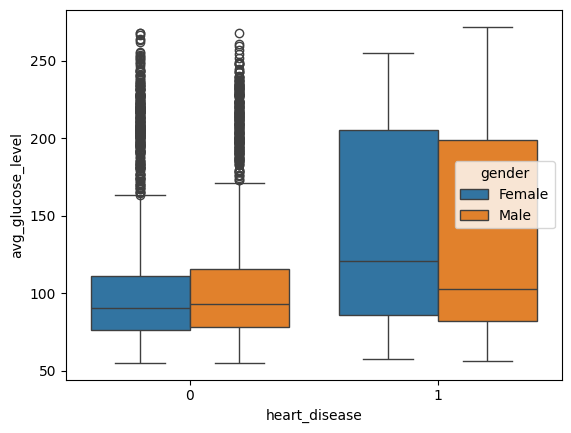

In [ ]:
# avg glucose level of person with heart_disease

sns.boxplot(df,x='heart_disease',y='avg_glucose_level',hue='gender')

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

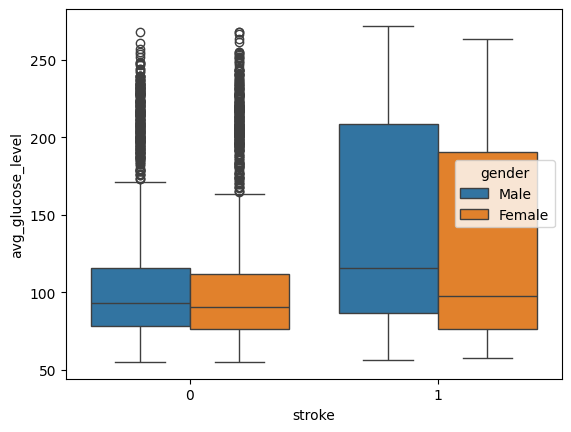

In [ ]:
# avg glucose level of person with stroke

sns.boxplot(df,x='stroke',y='avg_glucose_level',hue='gender')

<Axes: xlabel='Residence_type', ylabel='avg_glucose_level'>

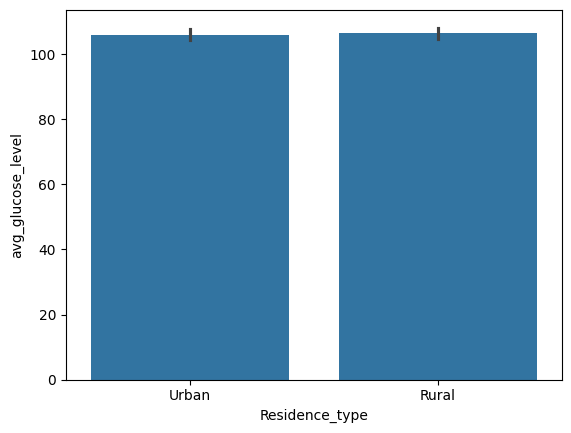

In [ ]:
# avg glucose level in a person based on its residence

sns.barplot(df,x='Residence_type',y='avg_glucose_level')

<Axes: xlabel='smoking_status', ylabel='avg_glucose_level'>

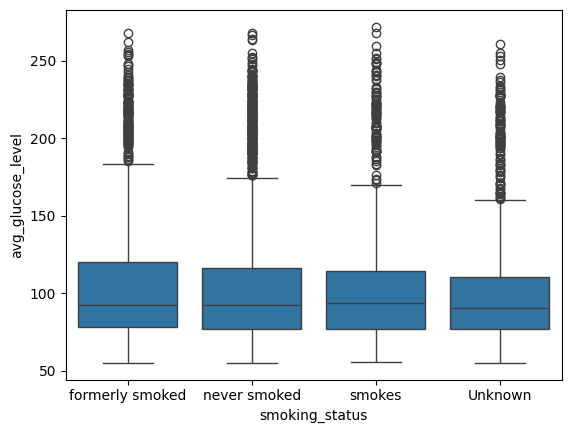

In [ ]:
# avg glucose levels depending on smoking status

sns.boxplot(df,x='smoking_status',y='avg_glucose_level')

## BMI

<Axes: xlabel='bmi', ylabel='Density'>

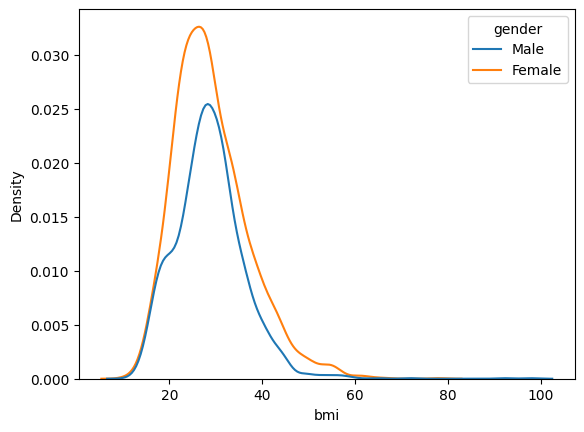

In [ ]:
# kde plot for distribution of bmi based on gender

sns.kdeplot(df,x="bmi",hue='gender')

In [ ]:
# person with maximum bmi in the data

df.loc[df['bmi'] == df['bmi'].max()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_binned
2128,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0,0-18


**The value of `97.6` BMI is clearly asn outlier**

<Axes: xlabel='gender', ylabel='bmi'>

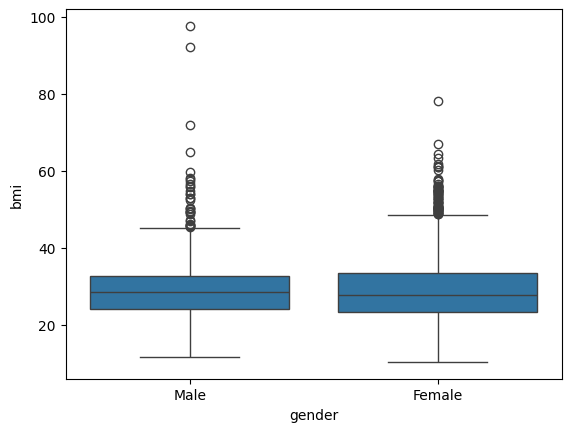

In [ ]:
# boxplots

sns.boxplot(df,y='bmi',x='gender')

<Axes: xlabel='age', ylabel='bmi'>

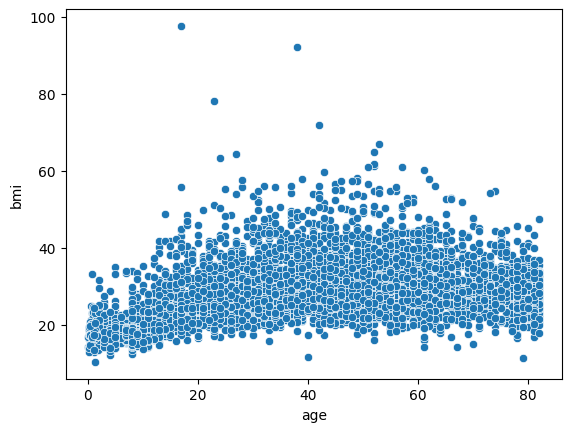

In [ ]:
# age vs bmi

sns.scatterplot(df,x='age',y='bmi')

<Axes: xlabel='work_type', ylabel='bmi'>

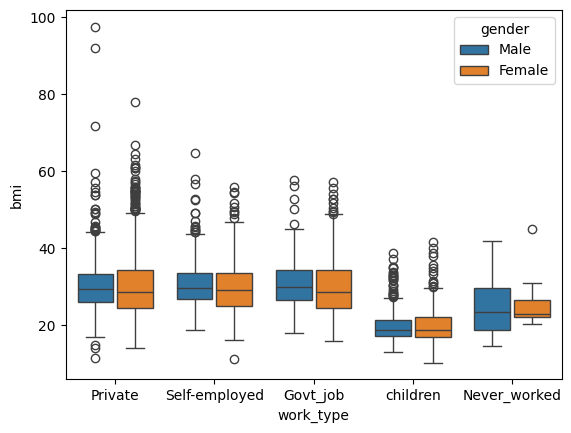

In [ ]:
# bmi depending on work type

sns.boxplot(df,x='work_type',y='bmi',hue='gender',gap=0.1)

<Axes: xlabel='hypertension', ylabel='bmi'>

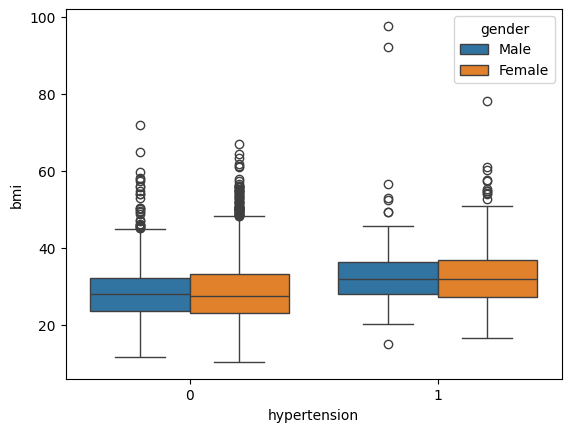

In [ ]:
# bmi of person with hypertension

sns.boxplot(df,x='hypertension',y='bmi',hue='gender')

<Axes: xlabel='heart_disease', ylabel='bmi'>

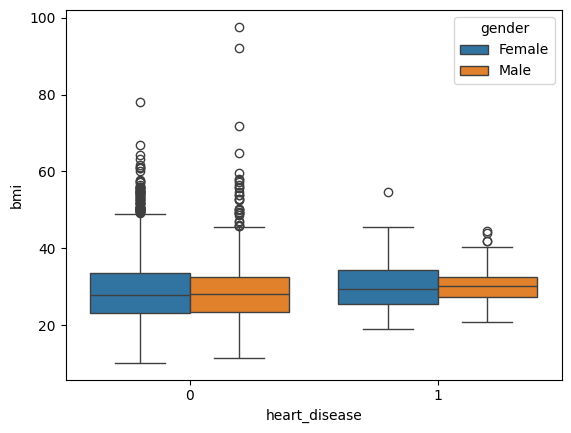

In [ ]:
# bmi of person with heart_disease

sns.boxplot(df,x='heart_disease',y='bmi',hue='gender')

<Axes: xlabel='stroke', ylabel='bmi'>

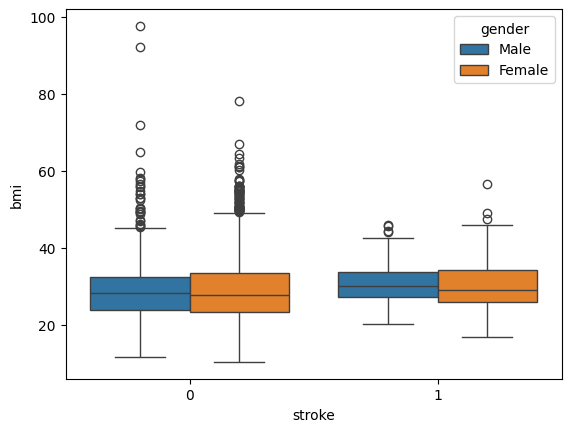

In [ ]:
# bmi of person with stroke

sns.boxplot(df,x='stroke',y='bmi',hue='gender')

<Axes: xlabel='Residence_type', ylabel='bmi'>

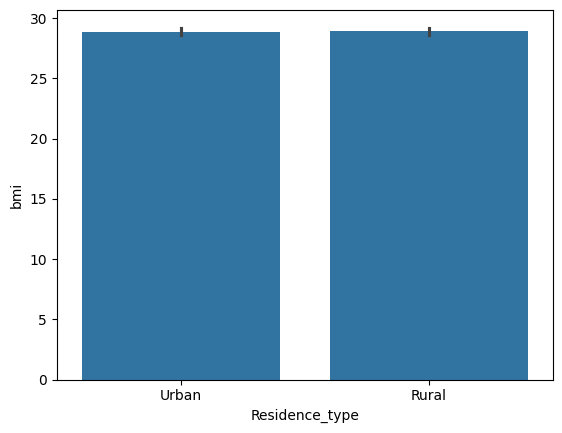

In [ ]:
# avg bmi of a person based on its residence

sns.barplot(df,x='Residence_type',y='bmi')

<Axes: xlabel='smoking_status', ylabel='bmi'>

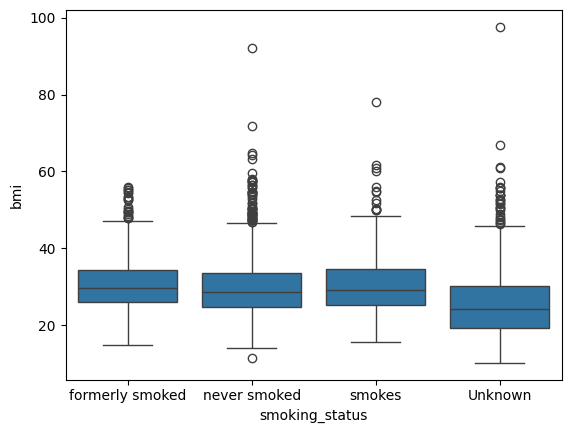

In [ ]:
# bmi depending on smoking status

sns.boxplot(df,x='smoking_status',y='bmi')

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_binned'],
      dtype='object')

## Residence Type

In [ ]:
# distribution of residence type in data

df['Residence_type'].value_counts(normalize=True).mul(100)

,proportion
Residence_type,
Urban,50.812292
Rural,49.187708


<Axes: xlabel='smoking_status', ylabel='count'>

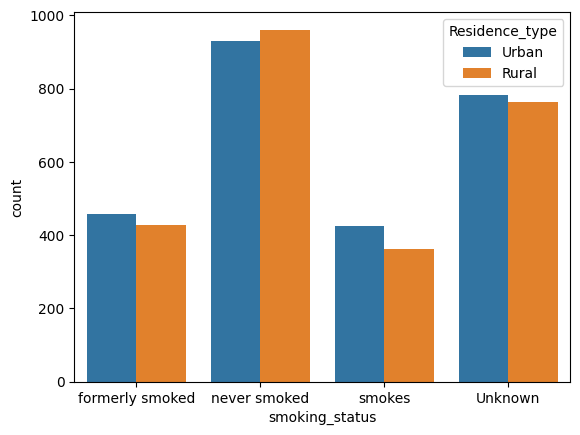

In [ ]:
# smokers in the data based on residence type

sns.countplot(df,x='smoking_status',hue='Residence_type')

**Observations**
1. People in the rural settings are more towards nmon-smokers and those who have formerly smoked.
2. People in Urban settings have more smokers.

<Axes: xlabel='work_type', ylabel='count'>

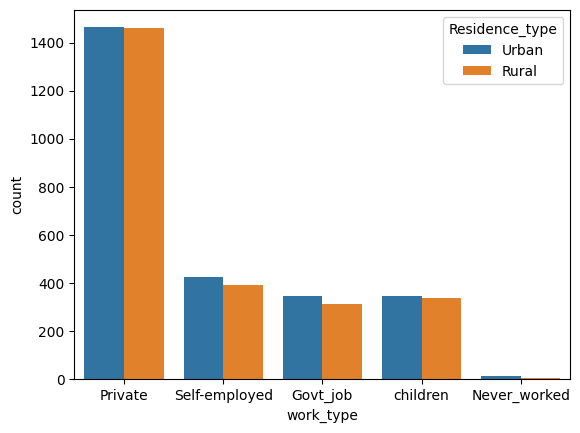

In [ ]:
# work type based on residence

sns.countplot(df,x='work_type',hue='Residence_type')

<Axes: xlabel='Residence_type', ylabel='count'>

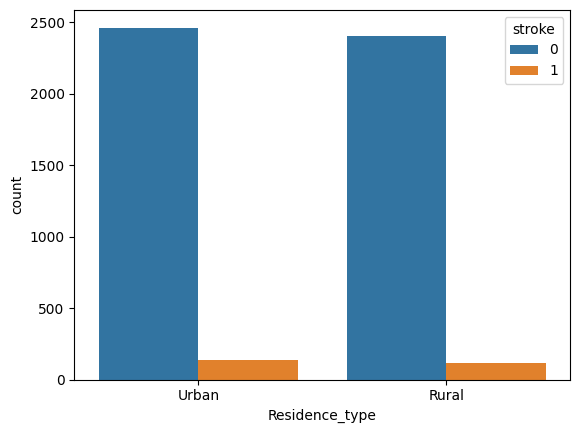

In [ ]:
# event of stroke based on residence type

sns.countplot(df,x='Residence_type',hue='stroke')

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_binned'],
      dtype='object')

## Smoking Status

In [ ]:
# distribution of smoking status

df['smoking_status'].value_counts(normalize=True).mul(100)

,proportion
smoking_status,
never smoked,37.032687
Unknown,30.221178
formerly smoked,17.302799
smokes,15.443335


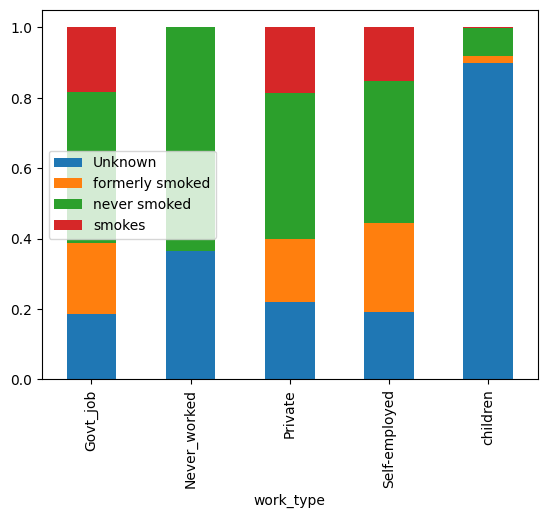

In [ ]:
# smokers based on worktype

(
    pd.crosstab(df['work_type'],df['smoking_status'],margins=True)
    .drop(index="All")
    .div(
        pd.crosstab(df['work_type'],df['smoking_status'],margins=True)
        .drop(index="All")
        .loc[:,"All"],axis=0
    )
    .drop(columns='All')
    .plot(kind='bar',stacked=True)
)
plt.legend(loc=0)

In [ ]:
# smoking related to stroke

contingency = pd.crosstab(df['smoking_status'],df['stroke'])

_ ,p_val, _, _ = chi2_contingency(contingency)

alpha = 0.05

print("Smoking and Stroke are related" if p_val <= alpha else "Smoking and Stroke are unrelated")

Smoking and Stroke are related


In [ ]:
# percentage of people in data who are smokers and also have all the three diseases

temp_df = df.copy()

temp_df['is_smoker'] = np.where(df['smoking_status'] == "smokes",1,0)

count_of_smokers_all_disease = temp_df[['is_smoker',"heart_disease","hypertension","stroke"]].all(axis=1).sum()

count_of_smokers_all_disease

5

In [ ]:
(count_of_smokers_all_disease / len(df)) * 100

0.09786651008025053

**Around 0.1% of people in the data are smokers and also suffers from all the diseases**

## Missing values

In [ ]:
# filter out the rows that contain missing data

missing_rows = df.loc[df['bmi'].isna(),:]

non_missing_rows = df.loc[df['bmi'].notnull(),:]

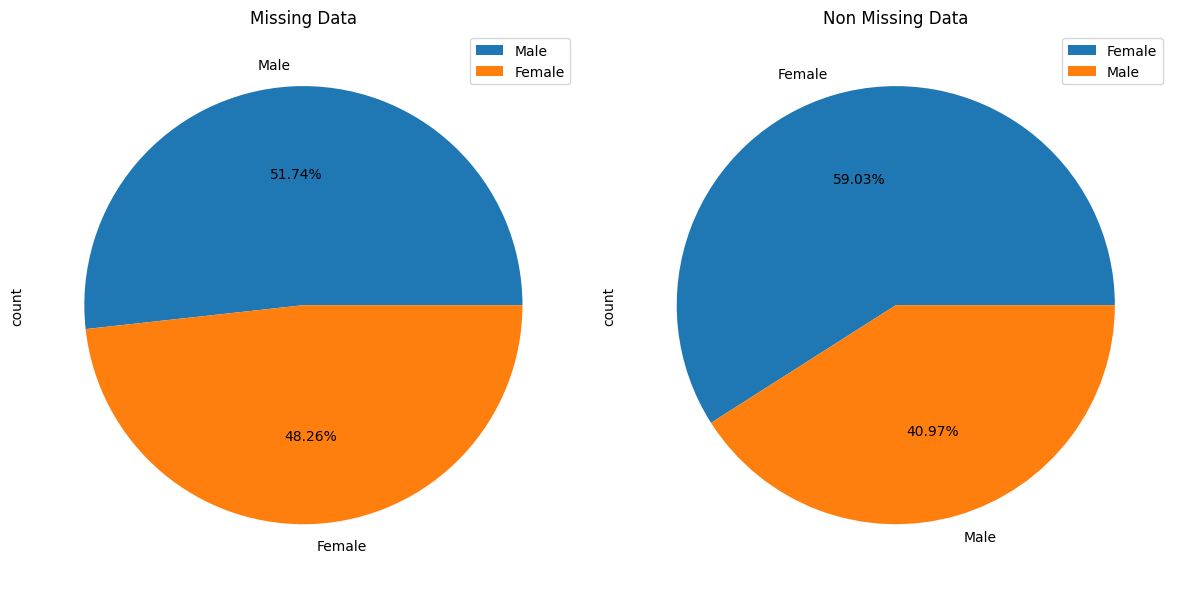

In [ ]:
# distribution of gender in the missing rows vs non-missing rows

def plot_pie_charts(col,kind='pie'):
    plt.figure(figsize=(12,6))
    # plot the first subplot
    plt.subplot(1,2,1)
    # set the title
    plt.title("Missing Data")
    missing_rows[col].value_counts().plot(kind=kind,autopct="%.2f%%")
    # display legends
    plt.legend()
    plt.tight_layout()

    # plot the second sublot
    plt.subplot(1,2,2)
    # set the title
    plt.title("Non Missing Data")
    non_missing_rows[col].value_counts().plot(kind=kind,autopct="%.2f%%")
    # display legends
    plt.legend()
    plt.tight_layout()

plot_pie_charts("gender")

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_binned'],
      dtype='object')

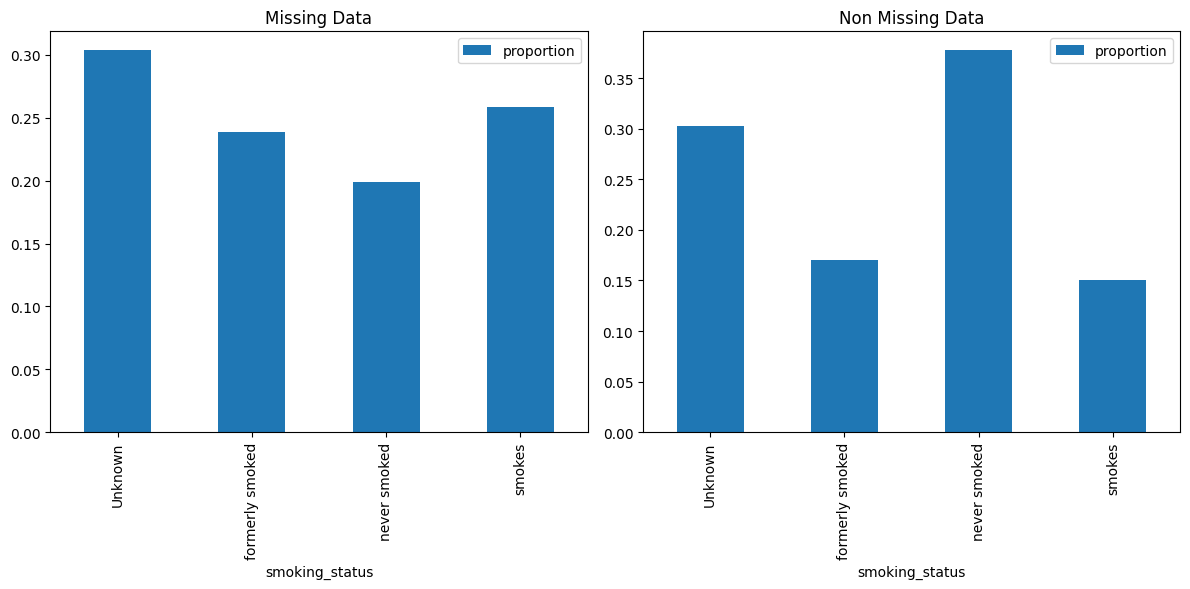

In [ ]:
# distribution of smokers missing vs non missing

def plot_bar_plots(col,kind='bar'):
    plt.figure(figsize=(12,6))
    # plot the first sublot
    plt.subplot(1,2,1)
    # set the title
    plt.title("Missing Data")
    missing_rows[col].value_counts(normalize=True).sort_index().plot(kind=kind)
    # display legends
    plt.legend()
    plt.tight_layout()

    # plot the second sublot
    plt.subplot(1,2,2)
    # set the title
    plt.title("Non Missing Data")
    non_missing_rows[col].value_counts(normalize=True).sort_index().plot(kind=kind)
    # display legends
    plt.legend()
    plt.tight_layout()

plot_bar_plots('smoking_status')

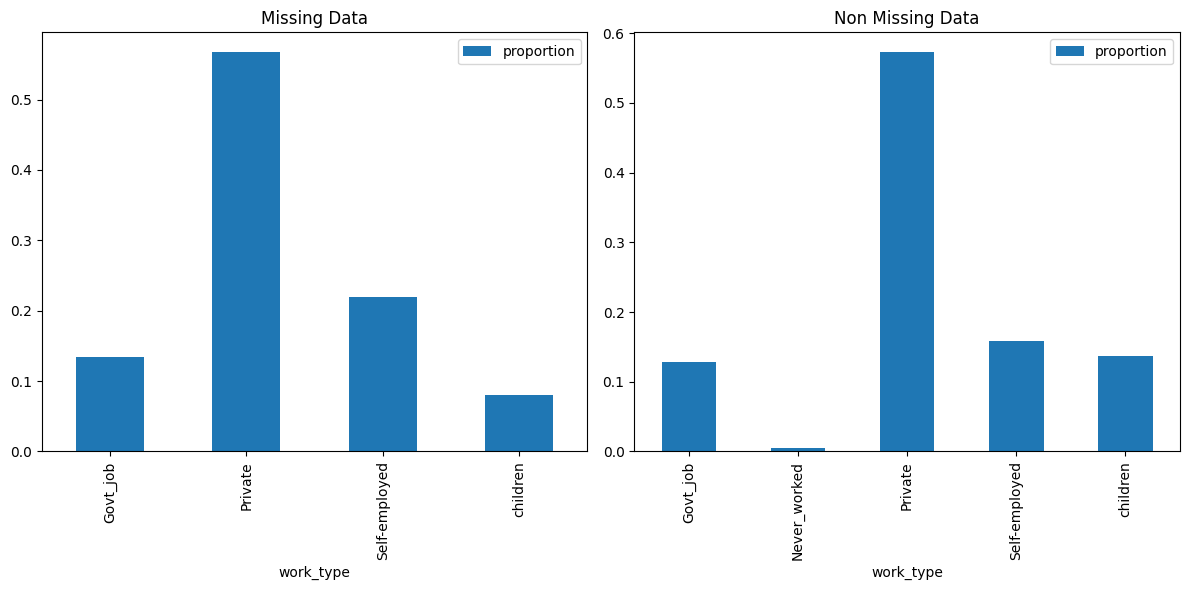

In [ ]:
# distribution of working status in misssing and non missing data

plot_bar_plots('work_type')

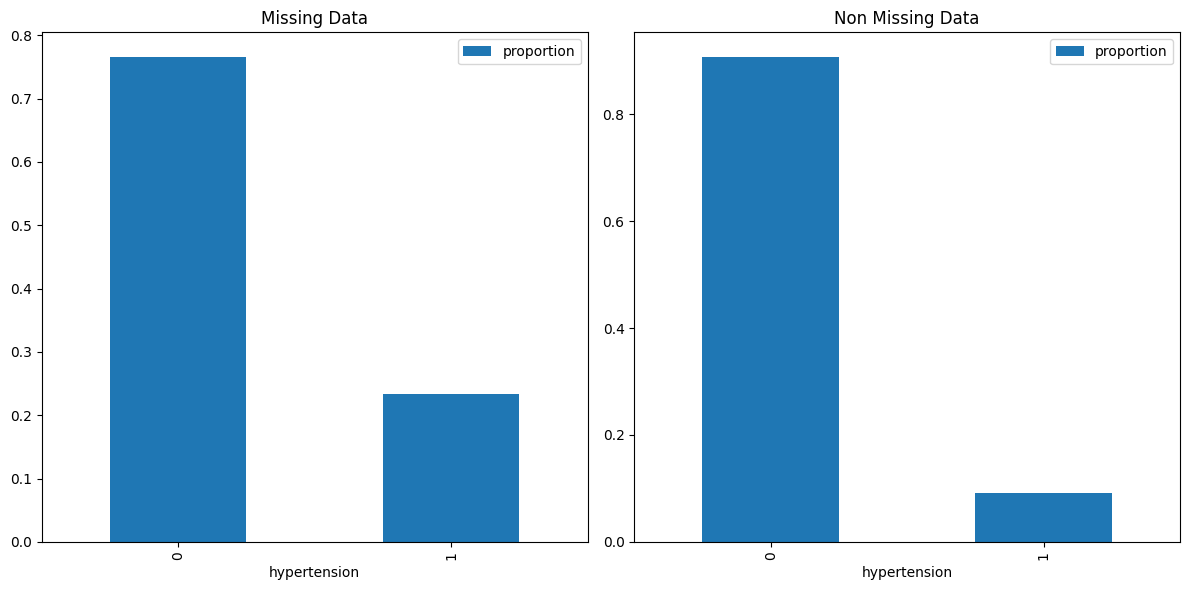

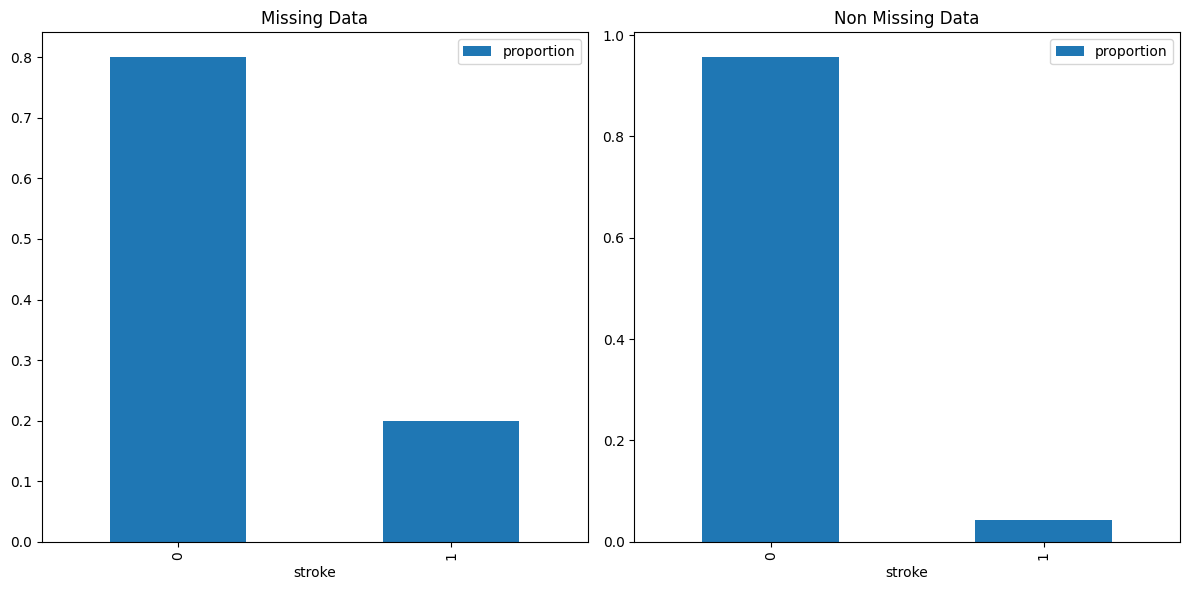

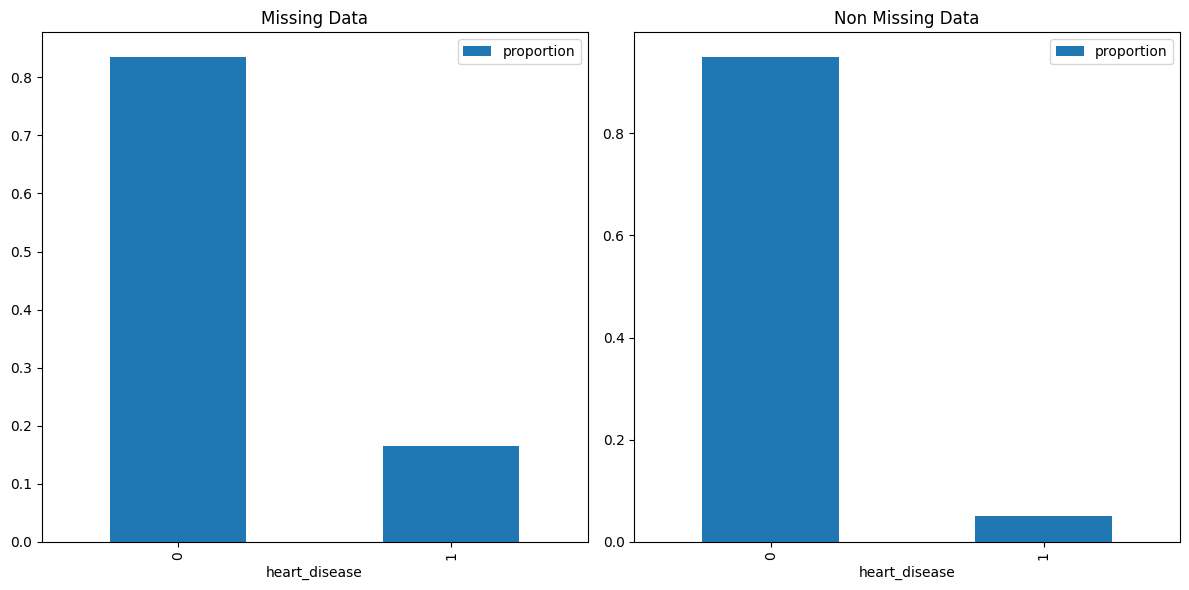

In [ ]:
# for all the diseases

diseases = ["hypertension","stroke","heart_disease"]

for disease in diseases:
    plot_bar_plots(disease)

In [ ]:
# finding MAR values using predictive model

df['missing_indicator_bmi'] = df['bmi'].isnull().astype(int)

In [ ]:
# Drop the original column with missing values
X = df.drop(columns=['bmi', 'missing_indicator_bmi','age_binned'])

# Target column is the missing indicator
y = df['missing_indicator_bmi']

In [ ]:
# relationship of missingness with categorical columns

for col in X.select_dtypes(exclude="float").columns.tolist():
    contingency = pd.crosstab(y,X[col])
    chi2_test = chi2_contingency(contingency)
    p_val = chi2_test.pvalue
    alpha = 0.05
    print(f"Missingness and {col} are related" if p_val <= alpha else f"Missingness and {col} are not related",f"p_values = {p_val}",
          sep="\n",end="\n\n")

Missingness and gender are related
p_values = 0.0030301692387473193

Missingness and hypertension are related
p_values = 6.642150102758533e-11

Missingness and heart_disease are related
p_values = 5.604776064044146e-12

Missingness and ever_married are related
p_values = 0.011970684083629802

Missingness and work_type are related
p_values = 0.03828952017074034

Missingness and Residence_type are not related
p_values = 0.6278789923418593

Missingness and smoking_status are related
p_values = 5.736529889324218e-08

Missingness and stroke are related
p_values = 3.1555650947719164e-23



In [ ]:
# relationship of missingness with numerical columns

for col in X.select_dtypes(include="float").columns.tolist():
    group_a = X.loc[y == 0, col]
    group_b = X.loc[y == 1, col]
    ttest = ttest_ind(group_a, group_b,nan_policy='omit')
    alpha = 0.05
    p_val = ttest.pvalue
    print(f"Missingness and {col} are related" if p_val <= alpha else f"Missingness and {col} are not related",f"p_values = {p_val}",
          sep="\n",end="\n\n")


Missingness and age are related
p_values = 1.6120167532271506e-08

Missingness and avg_glucose_level are related
p_values = 4.4585158984937624e-11



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# transform the columns

ohe = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

numerical_cols = X_train.select_dtypes(include='float').columns.tolist()
cat_cols = X_train.select_dtypes(include='object').columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('encode',ohe,cat_cols),
    ('scale',scaler,numerical_cols)
],remainder='passthrough',n_jobs=-1)

preprocessor

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('encode', OneHotEncoder(sparse_output=False),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type', 'smoking_status']),
                                ('scale', StandardScaler(),
                                 ['age', 'avg_glucose_level'])])

In [ ]:
X_train_transformed = preprocessor.fit_transform(X_train)

X_test_transformed = preprocessor.transform(X_test)

In [ ]:
# Train model
model = RandomForestClassifier(class_weight="balanced",random_state=42)
model.fit(X_train_transformed, y_train)

# Predict on test set
y_pred = model.predict(X_test_transformed)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.9608610567514677
F1 Score: 0.047619047619047616


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       982
           1       0.50      0.03      0.05        40

    accuracy                           0.96      1022
   macro avg       0.73      0.51      0.51      1022
weighted avg       0.94      0.96      0.94      1022



In [ ]:
# train model by fixing imbalance

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed,y_train)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred = model.predict(X_test_transformed)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.9422700587084148
F1 Score: 0.03278688524590164


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       982
           1       0.05      0.03      0.03        40

    accuracy                           0.94      1022
   macro avg       0.50      0.50      0.50      1022
weighted avg       0.93      0.94      0.93      1022



**Experiment more to investigate**